A catchment modelling system for simulation of flows in the Powells Creek Stormwater System has been developed using the Stormwater Management Model (SWMM).  The Powells Creek stormwater system is located near the Olympic Park area in the inner West of Sydney.

The ultimate aim of the catchment modelling system is the reproduction of both the quantity and quality of stormwater from the upstream catchment.  To increase the usefulness of the model, it is being calibrated against recorded data from a gauging station (located at Elva Ave, Strathfield) operated by the School of Civil and Environmental Engineering, UNSW.

An intern has created a reproduction of the recorded event. As their supervisor you are required to review their work and provide comment on how to improve the calibration achieved to date. Your manager has requested that you present your findings to them and provide them with a 500 word briefing note (or memo) to summarise the findings and future actions that they can share with the project manager and client.

The intern has provided and collated the following data is provided

* Recorded levels at the Elva Avenue Gauging Station for an event that occurred on 23 April 1989.
* The rating table for the Elva Avenue Gauging Station.
* A plot of the rating table for the Elva Avenue Gauging Station.
* The output for a simulation of the 23 April 1989 event using SWMM.

`Strathfield Recorded Levels 213304` download

`Strathfield rating table 213304` download

`Strathfield Stage Discharge 213304` download

`Simulation Results` download

The intern also prepared the `Bulk download of files` (download) for your convenience.

To assist, the intern has provided:

* Spreadsheet with the data in an excel format.
* Video explaining the data that they found online.

`Strathfield Project 1989-2020.xlsx`  download

In [73]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import os

# read input data

## simulated data

In [74]:
sim_data = pd.read_excel(io='./Inputs_CM_Assignment_2/strathfield 1989 2020.xlsx', sheet_name='Predicted Flows')
sim_data.drop(index=[136,137], inplace=True)
sim_data['Timestamp'] = pd.to_datetime(arg=sim_data.Date) + pd.to_timedelta(arg=sim_data.Time.astype(str))
sim_data = sim_data[sim_data.columns[[3,2]]]
sim_data

,Timestamp,Flow
0,1989-04-23 03:30:00,0.029
1,1989-04-23 03:35:00,0.789
2,1989-04-23 03:40:00,1.062
3,1989-04-23 03:45:00,0.755
4,1989-04-23 03:50:00,0.523
...,...,...
131,1989-04-23 17:20:00,0
132,1989-04-23 18:00:00,0
133,1989-04-23 18:40:00,0
134,1989-04-23 19:20:00,0


## recorded data

In [75]:
rec_data = pd.read_excel(io='./Inputs_CM_Assignment_2/strathfield 1989 2020.xlsx', sheet_name='Recorded Flows')
rec_data['Timestamp'] = pd.to_datetime(arg=rec_data.Date) + pd.to_timedelta(arg=rec_data.Time.astype(str))
rec_data = rec_data[rec_data.columns[[4,3]]]
rec_data

,Timestamp,Depth
0,1989-04-23 00:00:00,0.058
1,1989-04-23 00:05:00,0.057
2,1989-04-23 00:10:00,0.055
3,1989-04-23 00:15:00,0.055
4,1989-04-23 00:20:00,0.054
...,...,...
284,1989-04-23 23:40:00,0.074
285,1989-04-23 23:45:00,0.074
286,1989-04-23 23:50:00,0.074
287,1989-04-23 23:55:00,0.074


## rating curve

In [76]:
rat_cur = pd.read_table(filepath_or_buffer='./Inputs_CM_Assignment_2/strathfield/strathfield.txt', sep='\s+', skiprows=10)
rat_cur.drop(index=range(37,43), inplace=True)
rat_cur.drop(index=range(47,50), inplace=True)
rat_cur.reset_index(drop=True, inplace=True)
rat_cur.set_index(keys='G.H.', inplace=True)
rat_cur.astype(float)
rat_cur

,0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
G.H.,,,,,,,,,,
0.00,0.0,0.0,0.0,0.00634,0.0149,0.0280,0.0415,0.0564,0.0759,0.098
0.10,0.120,0.145,0.175,0.205,0.240,0.280,0.317,0.357,0.400,0.448
0.20,0.500,0.540,0.591,0.644,0.700,0.749,0.800,0.857,0.916,0.978
0.30,1.04,1.11,1.18,1.25,1.32,1.40,1.48,1.56,1.65,1.730
0.40,1.81,1.90,1.98,2.07,2.15,2.25,2.35,2.45,2.55,2.660
0.50,2.77,2.88,3.00,3.10,3.20,3.30,3.40,3.50,3.60,3.700
0.60,3.81,3.92,4.03,4.15,4.26,4.38,4.50,4.62,4.75,4.870
0.70,5.00,5.12,5.24,5.36,5.49,5.61,5.74,5.87,6.00,6.150
0.80,6.30,6.45,6.60,6.72,6.83,6.95,7.07,7.19,7.31,7.430


In [77]:
def rounding(n, decimal=0):
    multp = 10**decimal
    n_trunc = math.trunc(n*multp)/multp
    if math.trunc((n - n_trunc)*(multp*10)) >= 5:
        return math.trunc((n_trunc + 1/multp)*multp)/multp
    else:
        return n_trunc

In [78]:
info = np.array([[rounding(float(indc) + float(indr), 2), float(rat_cur.loc[indr, indc])] 
                 for indr in rat_cur.index 
                 for indc in rat_cur.columns])

In [79]:
rat_cur = pd.DataFrame(data=info, columns=['Depth', 'Flow'])
rat_cur.dropna(axis=0, inplace=True)
rat_cur.reset_index(drop=True, inplace=True)
rat_cur

,Depth,Flow
0,0.00,0.00000
1,0.01,0.00000
2,0.02,0.00000
3,0.03,0.00634
4,0.04,0.01490
...,...,...
396,3.96,78.00000
397,3.97,78.50000
398,3.98,79.00000
399,3.99,79.50000


In [80]:
new_ind = pd.DataFrame(data=np.arange(start=rat_cur.Depth.min(), stop=rat_cur.Depth.max(), step=0.001), columns=['Depth'])
new_ind.Depth.apply(lambda arg: rounding(arg, 3))
new_ind

,Depth
0,0.000
1,0.001
2,0.002
3,0.003
4,0.004
...,...
3995,3.995
3996,3.996
3997,3.997
3998,3.998


In [81]:
rat_cur = pd.concat(objs=[rat_cur, new_ind], axis=0)
rat_cur.Depth = rat_cur.Depth.apply(lambda arg: rounding(arg, 3))
rat_cur.drop_duplicates(subset='Depth', inplace=True)
rat_cur.sort_values(by='Depth', inplace=True)
rat_cur.reset_index(drop=True, inplace=True)
rat_cur.interpolate(method='linear', axis=0, inplace=True)
rat_cur

,Depth,Flow
0,0.000,0.00
1,0.001,0.00
2,0.002,0.00
3,0.003,0.00
4,0.004,0.00
...,...,...
3996,3.996,79.80
3997,3.997,79.85
3998,3.998,79.90
3999,3.999,79.95


# merging recorded data and rating curve

## recorded data

In [82]:
rec_data = pd.merge(left=rat_cur, right=rec_data, how='right', on='Depth')
rec_data = rec_data[rec_data.columns[[2,1]]]
rec_data

,Timestamp,Flow
0,1989-04-23 00:00:00,0.03880
1,1989-04-23 00:05:00,0.03745
2,1989-04-23 00:10:00,0.03475
3,1989-04-23 00:15:00,0.03475
4,1989-04-23 00:20:00,0.03340
...,...,...
284,1989-04-23 23:40:00,0.06420
285,1989-04-23 23:45:00,0.06420
286,1989-04-23 23:50:00,0.06420
287,1989-04-23 23:55:00,0.06420


In [83]:
print('min: {}\nmax: {}'.format(rec_data.Timestamp.min(), rec_data.Timestamp.max()))
print('min: {}\nmax: {}'.format(rec_data.Flow.min(), rec_data.Flow.max()))

min: 1989-04-23 00:00:00
max: 1989-04-24 00:00:00
min: 0.02538
max: 7.442


In [84]:
print('min: {}\nmax: {}'.format(sim_data.Timestamp.min(), sim_data.Timestamp.max()))
print('min: {}\nmax: {}'.format(sim_data.Flow.min(), sim_data.Flow.max()))

min: 1989-04-23 03:30:00
max: 1989-04-23 20:00:00
min: 0
max: 7.114


# create output directory

In [85]:
arg_output_dir='./Outputs_CM_Assignment_2/'
arg_output_dir

'./Outputs_CM_Assignment_2/'

In [86]:
def create_output_dir(arg_output_dir):
    """create output directory if it does not exist

    arguments:
        arg_output_dir = [string] './Outputs_CM_Assignment_2/'
    """
    if not os.path.exists(arg_output_dir):
        os.makedirs(arg_output_dir)

# comparing simulated and recorded data

In [87]:
def move_compare_hydrographs(minutes=0, sim_data=sim_data, rec_data=rec_data):
    # delta time
    delta_time = dt.timedelta(minutes=minutes)
    
    # transforming data by delta time
    sim_data_transformed = sim_data.copy()
    sim_data_transformed.Timestamp = sim_data_transformed.Timestamp + delta_time
    
    # minimum and maximum timestamps
    min_time = sim_data_transformed.Timestamp.min()
    max_time = sim_data_transformed.Timestamp.max()

    # dataframe
    df = pd.concat(objs=[rec_data.set_index(keys='Timestamp'), sim_data_transformed.set_index(keys='Timestamp')], axis=1)
    df.reset_index(drop=False, inplace=True)
    df = df[(df.Timestamp >= min_time) & (df.Timestamp <= max_time)]
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.columns = ['Timestamp', 'Recorded_data', 'Simulated_data']

    # columns for metrics
    df['dif'] = df.Simulated_data - df.Recorded_data
    df['sq_dif'] = df.dif**2
    df['rel_sq_dif'] = (df.dif/df.Recorded_data)**2
    df['dif_rec'] = df.Recorded_data - df.Recorded_data.mean()
    df['dif_sim'] = df.Simulated_data - df.Simulated_data.mean()
    df['sq_dif_rec'] = df.dif_rec**2
    df['sq_dif_sim'] = df.dif_sim**2
    df['prod_rec_sim'] = df.dif_rec*df.dif_sim
    df['delta_time'] = df.Timestamp.diff()/dt.timedelta(seconds=1)
    df['rec_lft'] = df.Recorded_data.shift(periods=1)
    df['rec_rgt'] = df.Recorded_data.shift(periods=-1).shift(periods=1)
    df['sim_lft'] = df.Simulated_data.shift(periods=1)
    df['sim_rgt'] = df.Simulated_data.shift(periods=-1).shift(periods=1)
    df['ave_rec'] = (df.rec_lft + df.rec_rgt)*df.delta_time/2
    df['ave_sim'] = (df.sim_lft + df.sim_rgt)*df.delta_time/2

    # root mean square error
    rmse = df.sq_dif.mean()**0.5
    # mean squared error
    mse = df.sq_dif.mean()
    # sum of square differences - absolute
    ssd_abs = df.sq_dif.sum()
    # sum of square differences - relative
    ssd_rel = df.rel_sq_dif.sum()
    # Nash-Sutcliffe Efficiency - modelling efficiency
    nse = 1 - (df.sq_dif.sum()/df.sq_dif_rec.sum())
    # mean error - mean bias error
    me = df.dif.mean()
    # coefficient of variation
    r2 = (df.prod_rec_sim.sum()**2)/(df.sq_dif_rec.sum()*df.sq_dif_sim.sum())
    # Kling-Gupta Efficacy
    kge = (
        1 - 
        (((r2**0.5) - 1)**2) + 
        (((df.Simulated_data.mean()/df.Recorded_data.mean()) - 1)**2) + 
        ((((df.Simulated_data.std()/df.Simulated_data.mean())/(df.Recorded_data.std()/df.Recorded_data.mean())) - 1)**2)
        )**0.5
    # recorded average volume
    vol_rec = df.ave_rec.sum()
    # simulated average volume
    vol_sim = df.ave_sim.sum()
    # volume difference
    vol_dif = vol_sim - vol_rec

    # dataframe metrics
    metrics = pd.DataFrame(data=np.array([
        ['rmse', rmse], 
        ['mse', mse], 
        ['ssd_abs', ssd_abs], 
        ['ssd_rel', ssd_rel], 
        ['nse', nse],
        ['me', me],
        ['r2', r2],
        ['kge', kge],
        ['vol_dif', vol_dif]
        ]), columns=['metric', 'value'])

    # plot
    fig, ax = plt.subplots()
    ax = df.plot(
        x='Timestamp', 
        y=['Recorded_data', 'Simulated_data'], 
        kind='line',
        ax=ax, 
        figsize=(15,8), 
        title='Recorded Data and Simulated Data\n{}-minute shifted'.format(int(minutes)),
        grid=True,
        xlabel='Timestamp',
        ylabel='Flow Rate in (m^3/s)'
        )
    ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%m-%d %H:%M'))

    # save figures
    fig.savefig(arg_output_dir + 'Rec_Data_and_Sim_Data_{:>03}_min.png'.format(int(minutes)))

    return delta_time, sim_data_transformed, min_time, max_time, df, metrics

In [88]:
proposed_trans_values = pd.DataFrame(data=np.arange(start=0, stop=120, step=5), columns=['transformation'])
proposed_trans_values

,transformation
0,0
1,5
2,10
3,15
4,20
5,25
6,30
7,35
8,40
9,45


/tmp/ipykernel_34239/3095263054.py:82: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


,delta_time,sim_data_transformed,min_time,max_time,df,metrics
0,0 days 00:00:00,Timestamp Flow 0 1989-04-23 ...,1989-04-23 03:30:00,1989-04-23 20:00:00,Timestamp Recorded_data Simulat...,metric value 0 rmse ...
1,0 days 00:05:00,Timestamp Flow 0 1989-04-23 ...,1989-04-23 03:35:00,1989-04-23 20:05:00,Timestamp Recorded_data Simulat...,metric value 0 rmse ...
2,0 days 00:10:00,Timestamp Flow 0 1989-04-23 ...,1989-04-23 03:40:00,1989-04-23 20:10:00,Timestamp Recorded_data Simulat...,metric value 0 rmse ...
3,0 days 00:15:00,Timestamp Flow 0 1989-04-23 ...,1989-04-23 03:45:00,1989-04-23 20:15:00,Timestamp Recorded_data Simulat...,metric value 0 rmse ...
4,0 days 00:20:00,Timestamp Flow 0 1989-04-23 ...,1989-04-23 03:50:00,1989-04-23 20:20:00,Timestamp Recorded_data Simulat...,metric value 0 rmse ...
5,0 days 00:25:00,Timestamp Flow 0 1989-04-23 ...,1989-04-23 03:55:00,1989-04-23 20:25:00,Timestamp Recorded_data Simulat...,metric value 0 rmse ...
6,0 days 00:30:00,Timestamp Flow 0 1989-04-23 ...,1989-04-23 04:00:00,1989-04-23 20:30:00,Timestamp Recorded_data Simulat...,metric value 0 rmse ...
7,0 days 00:35:00,Timestamp Flow 0 1989-04-23 ...,1989-04-23 04:05:00,1989-04-23 20:35:00,Timestamp Recorded_data Simulat...,metric value 0 rmse ...
8,0 days 00:40:00,Timestamp Flow 0 1989-04-23 ...,1989-04-23 04:10:00,1989-04-23 20:40:00,Timestamp Recorded_data Simulat...,metric value 0 rmse ...
9,0 days 00:45:00,Timestamp Flow 0 1989-04-23 ...,1989-04-23 04:15:00,1989-04-23 20:45:00,Timestamp Recorded_data Simulat...,metric value 0 rmse ...


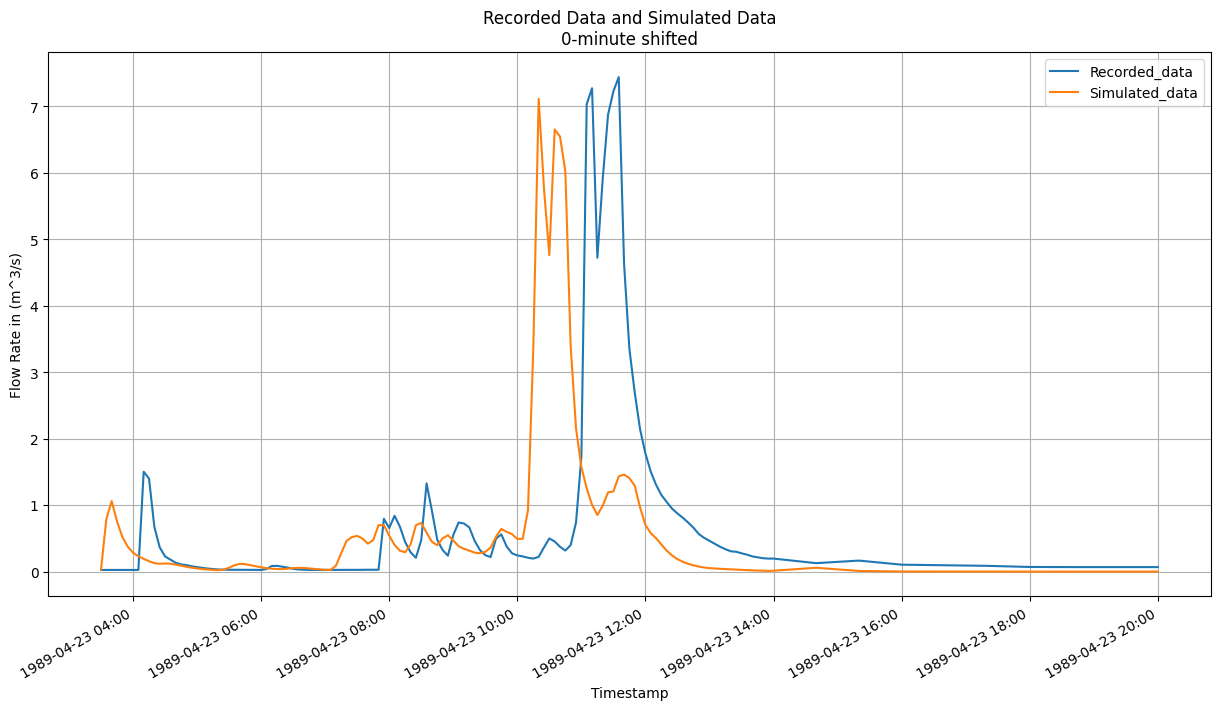

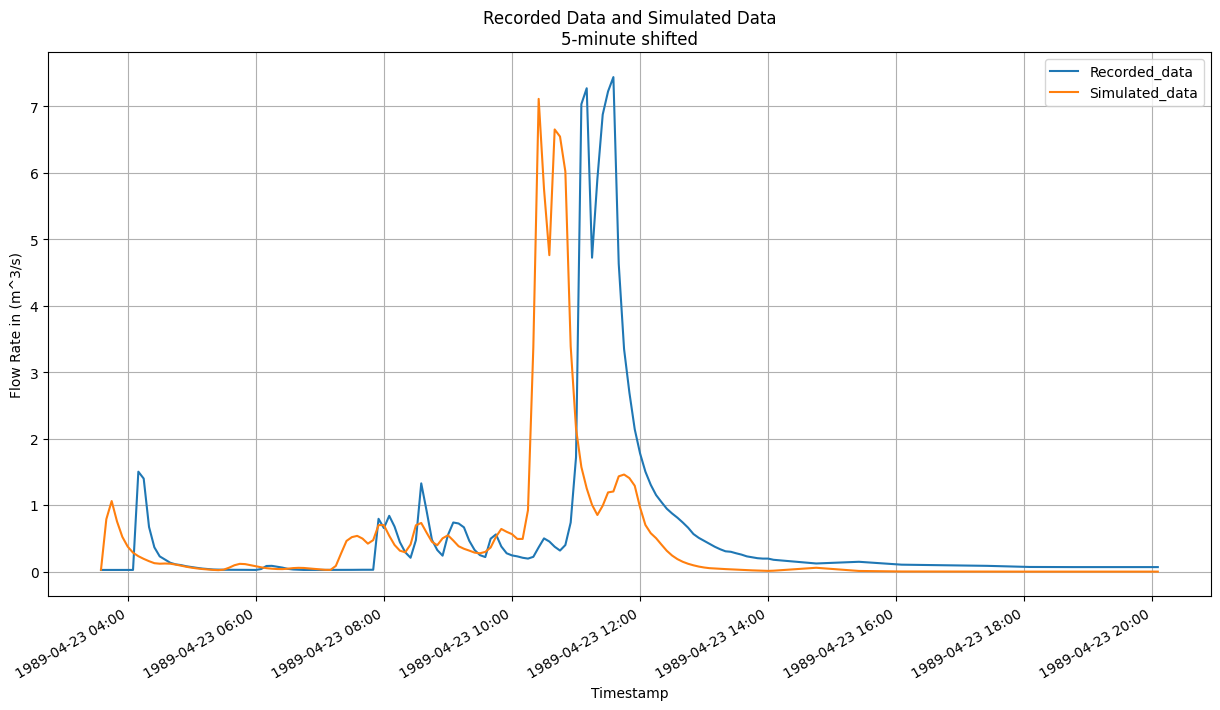

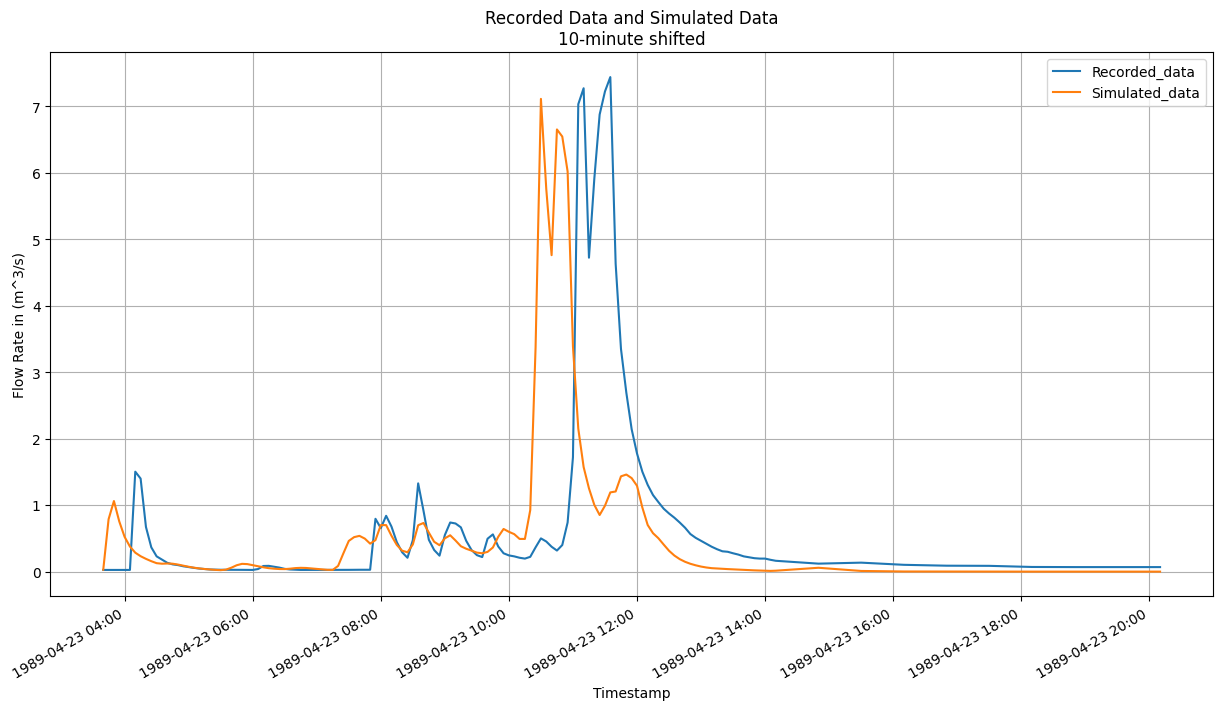

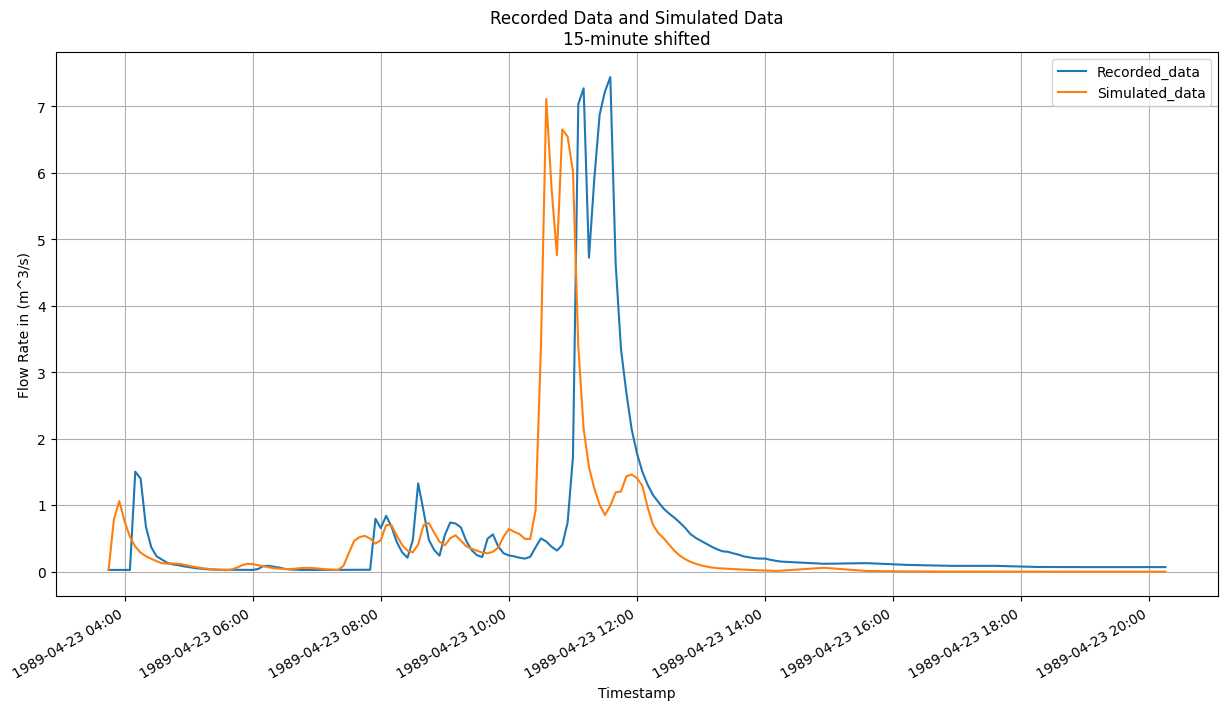

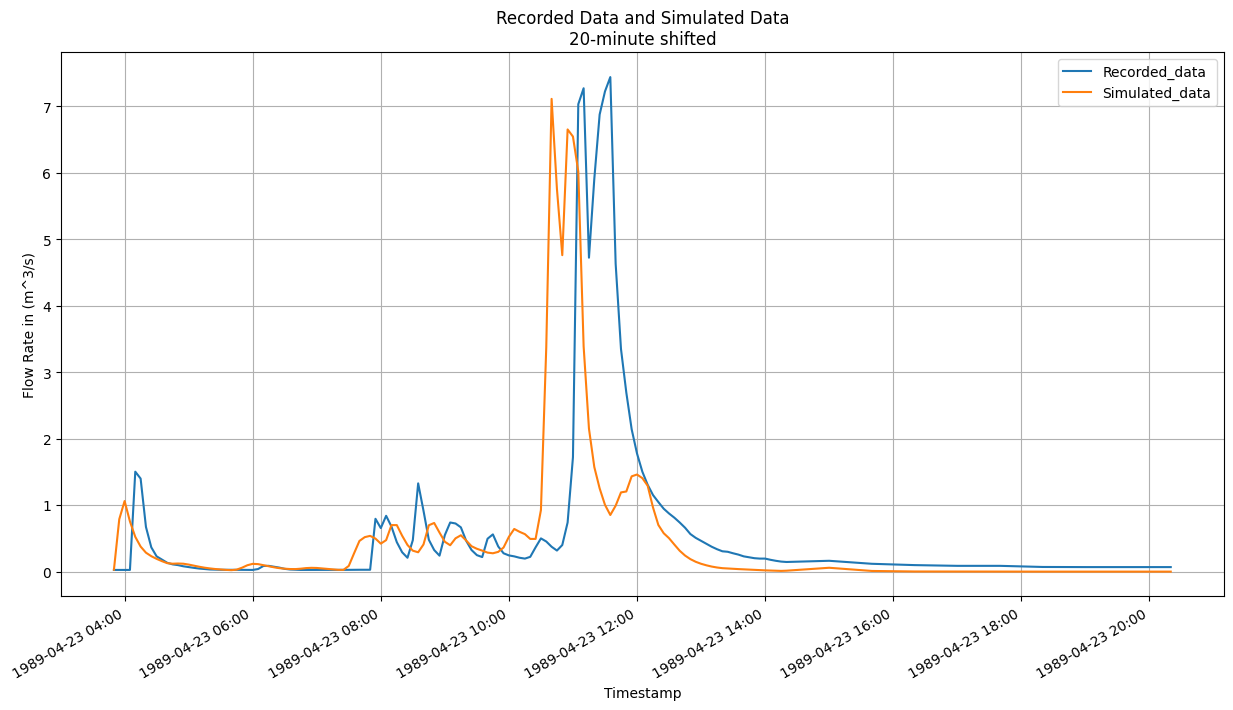

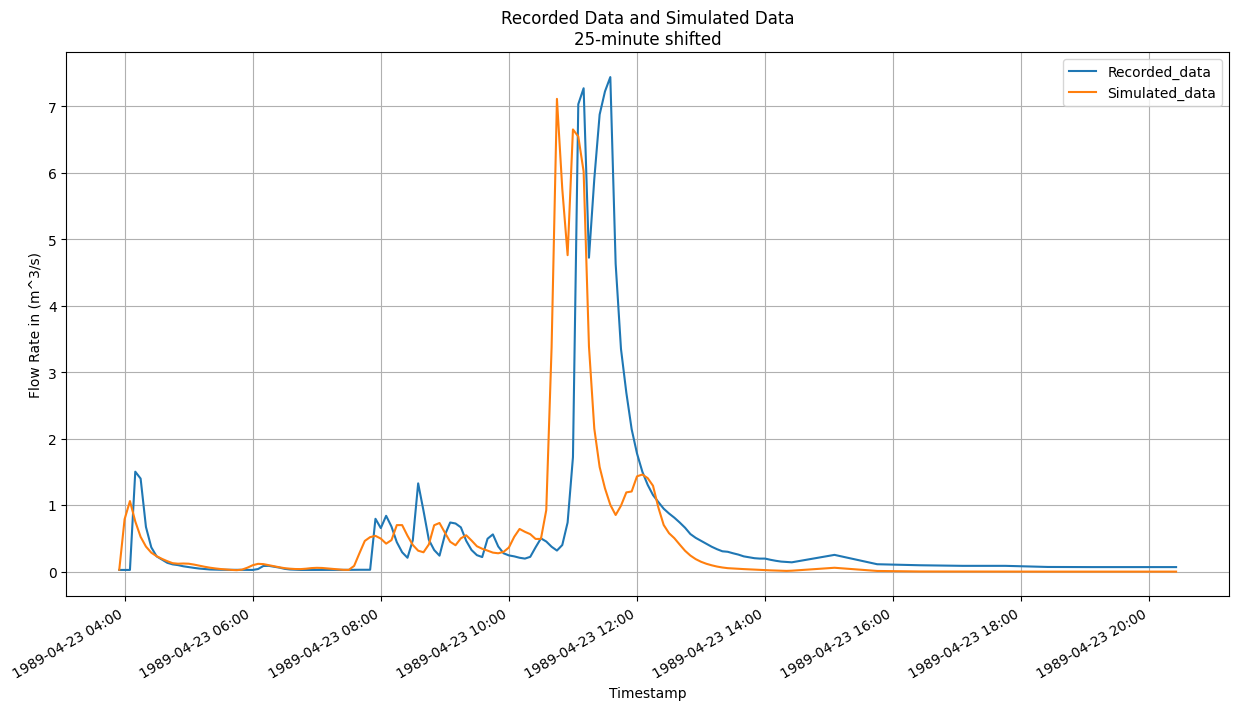

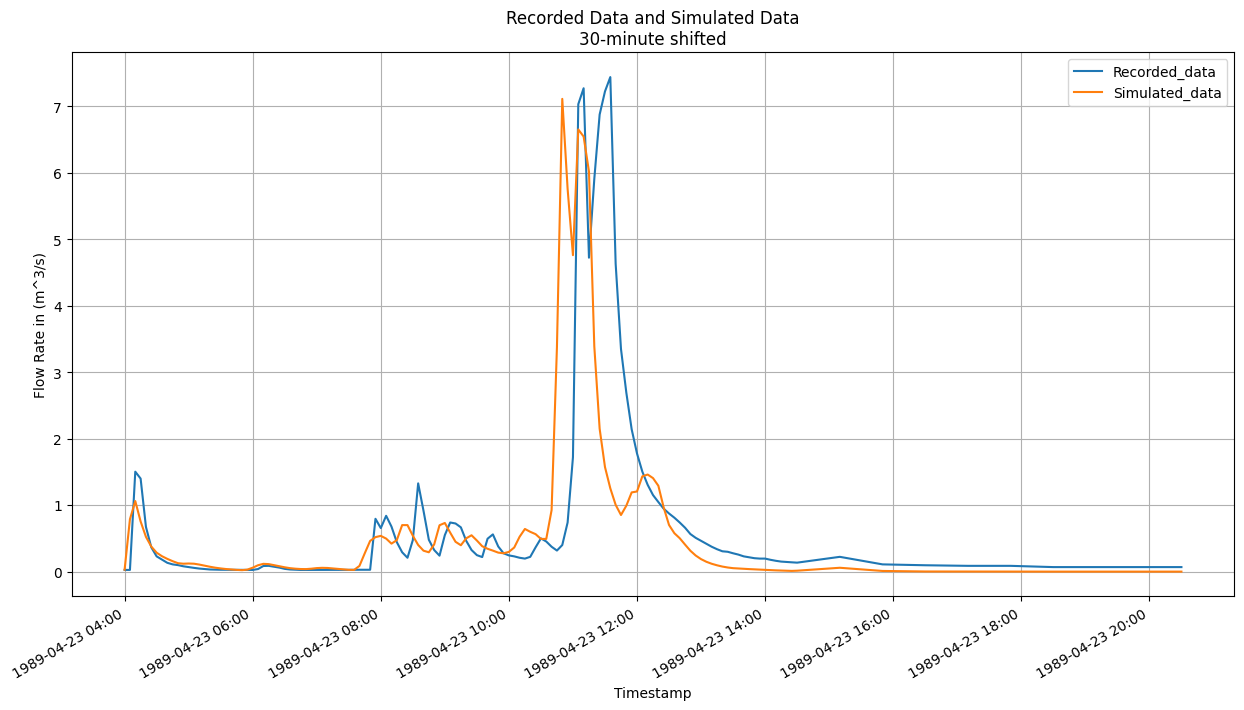

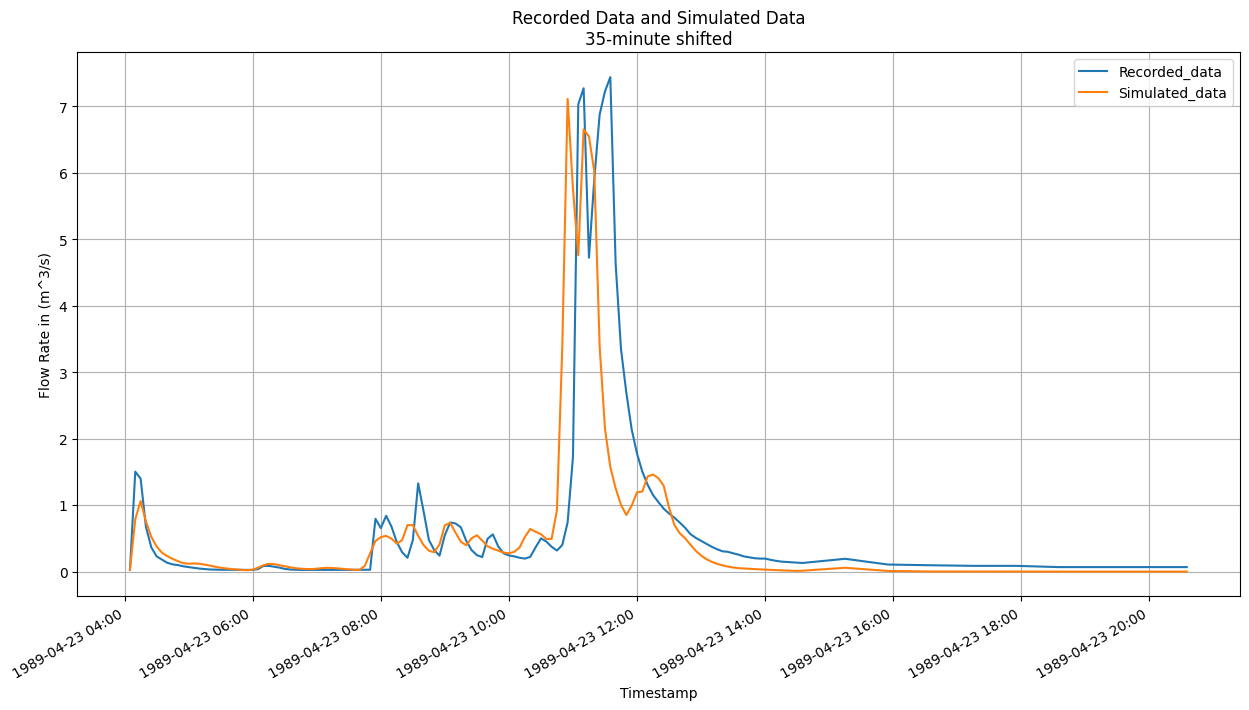

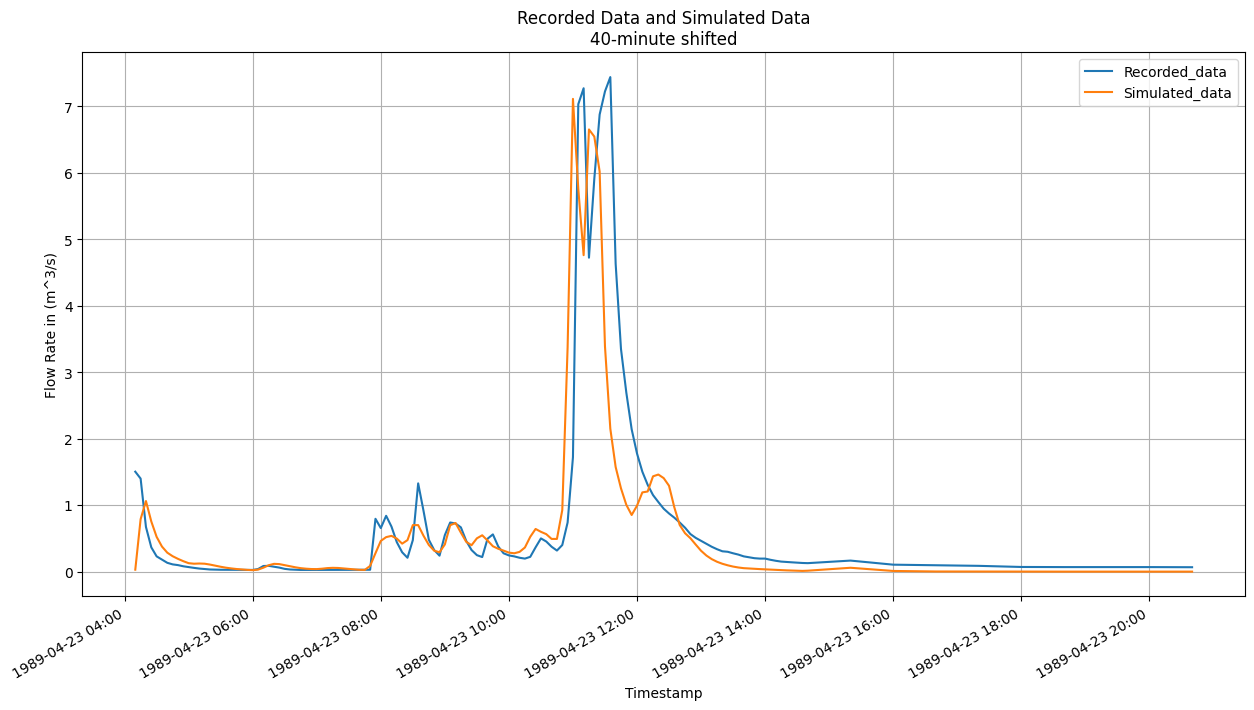

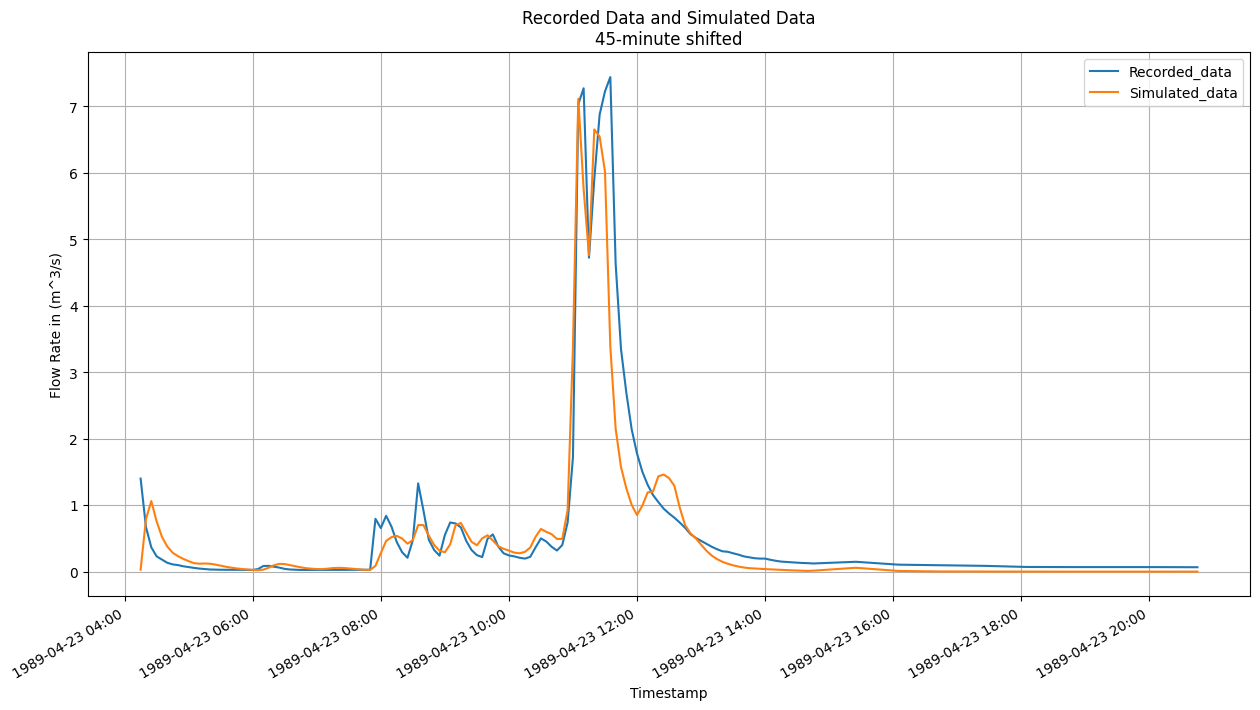

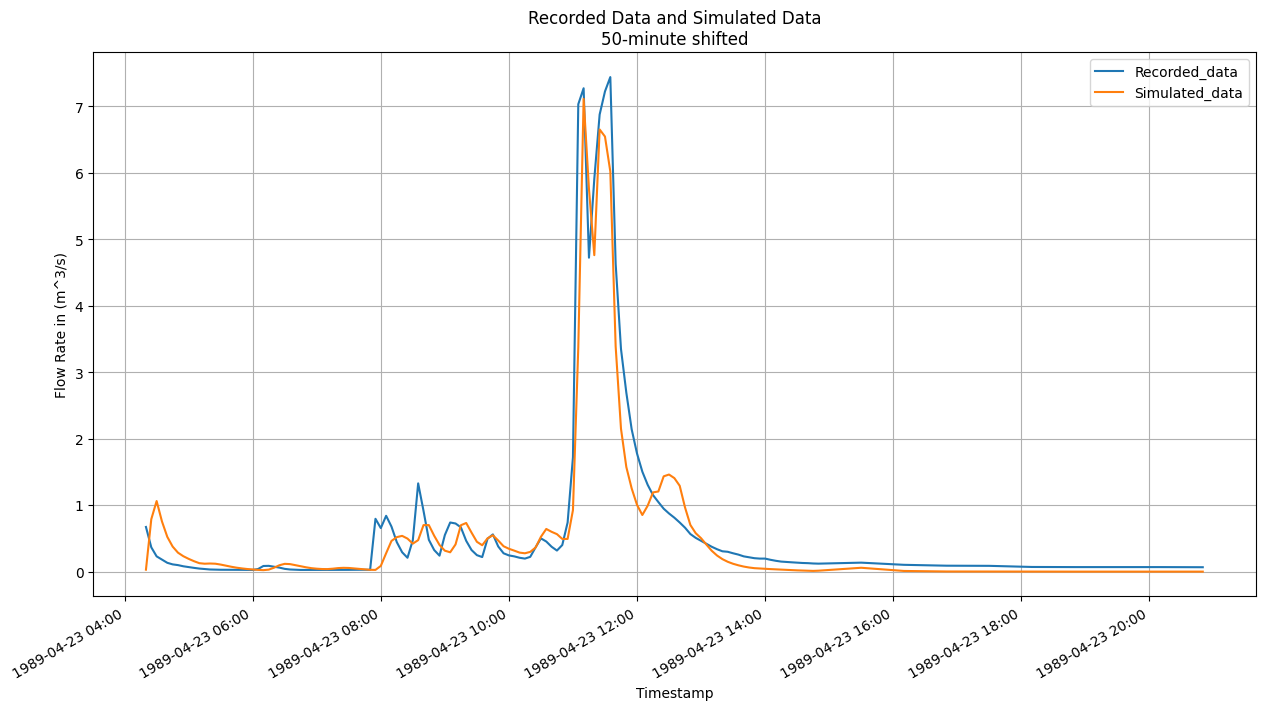

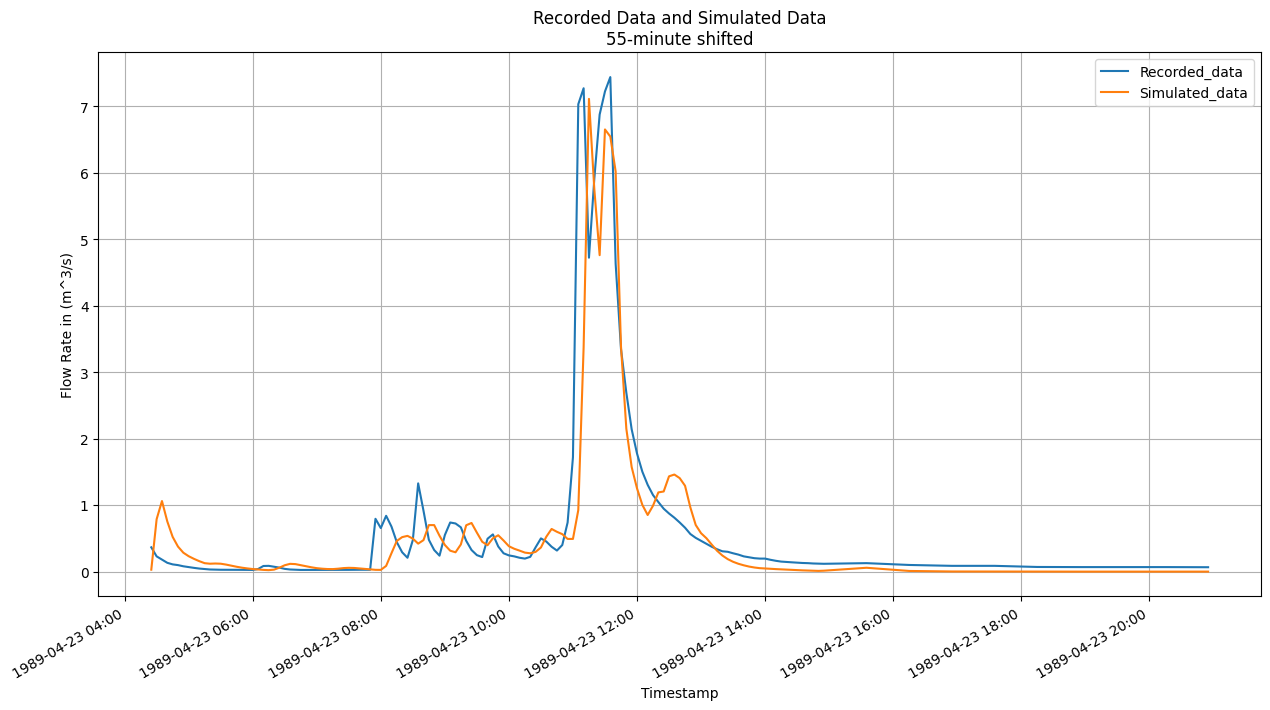

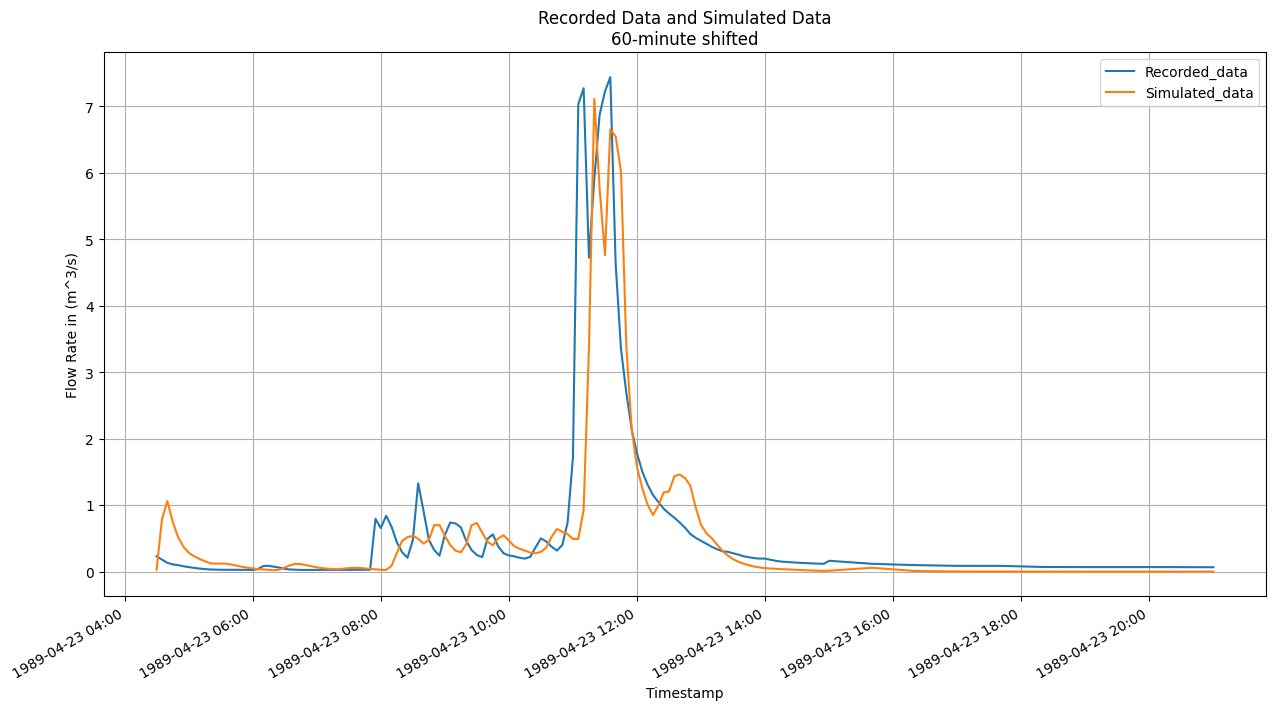

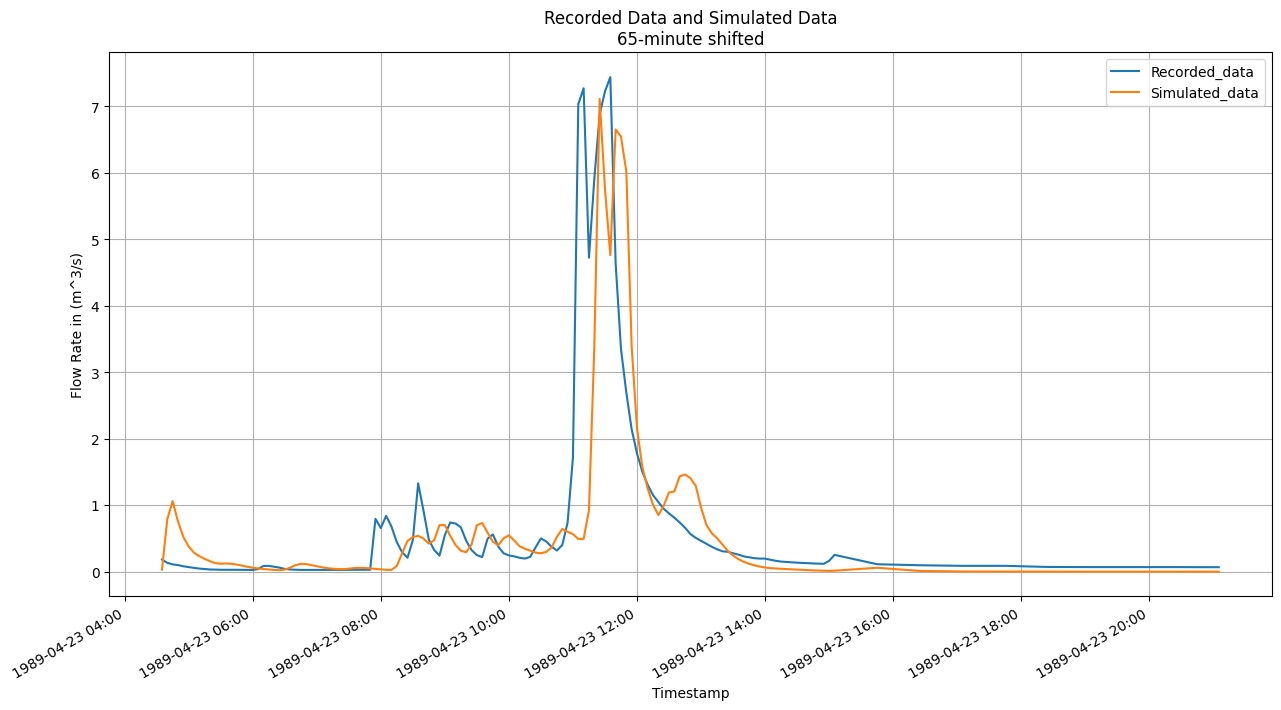

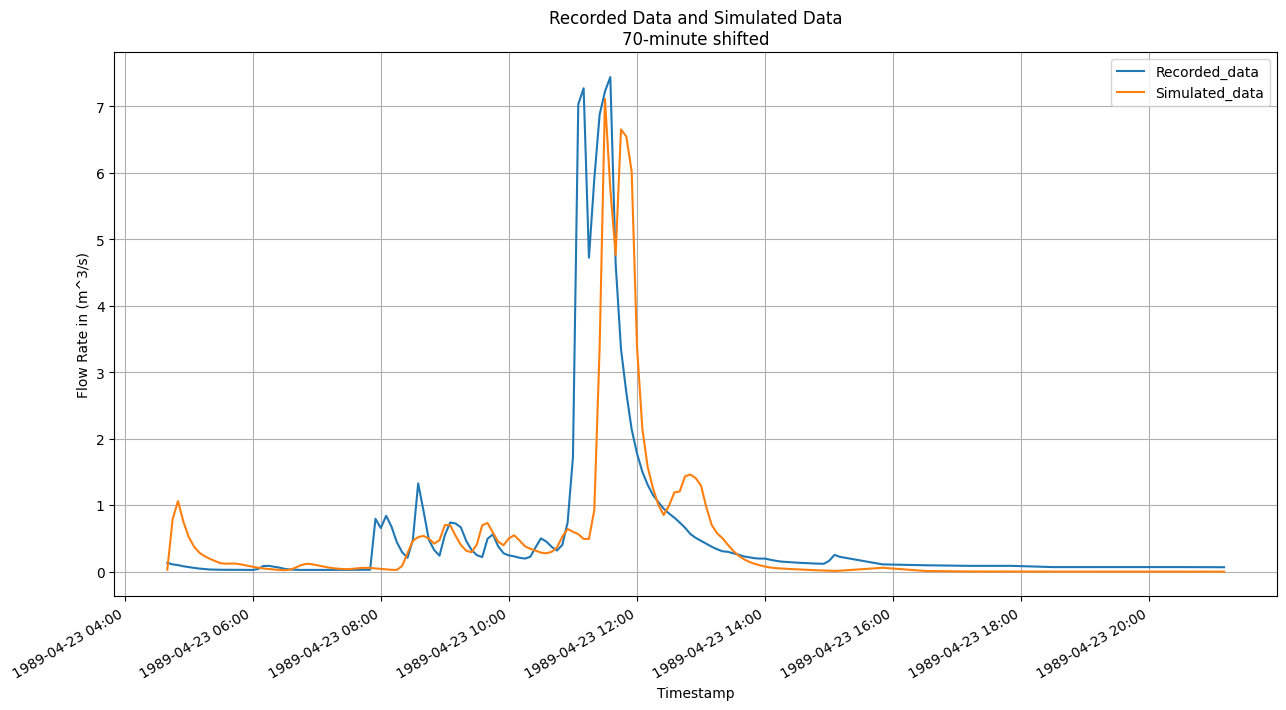

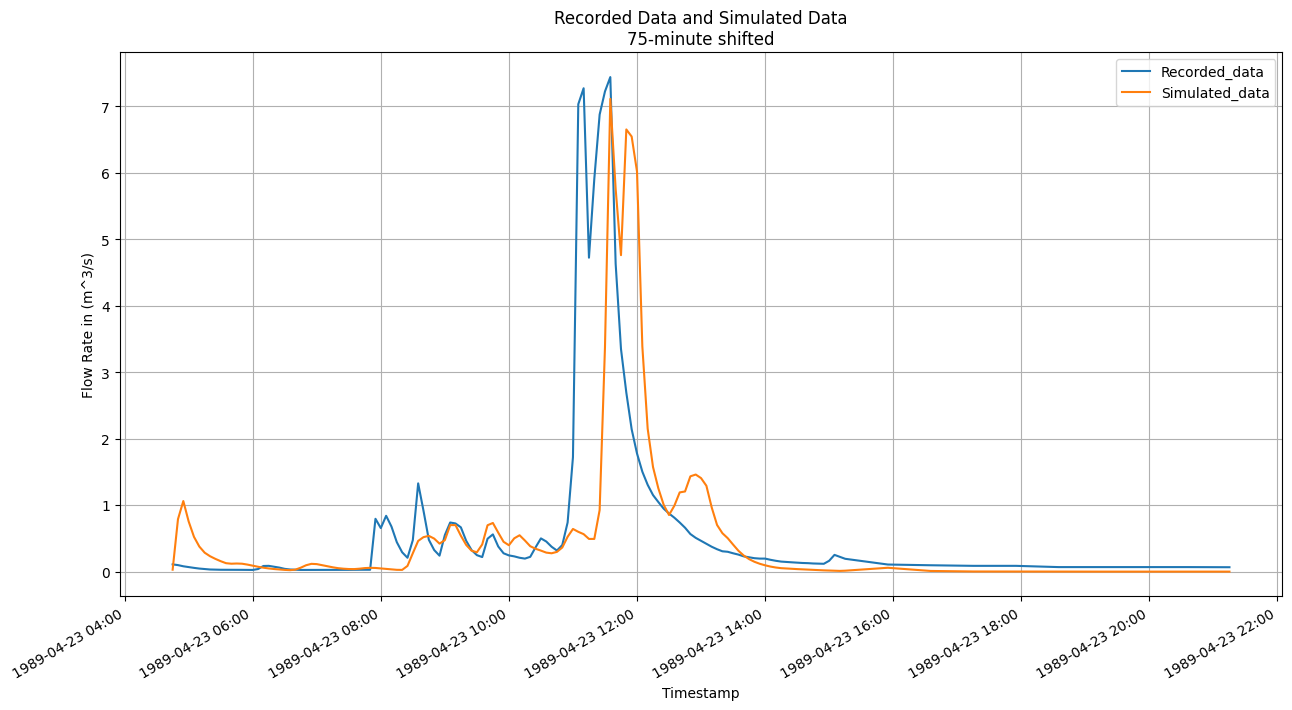

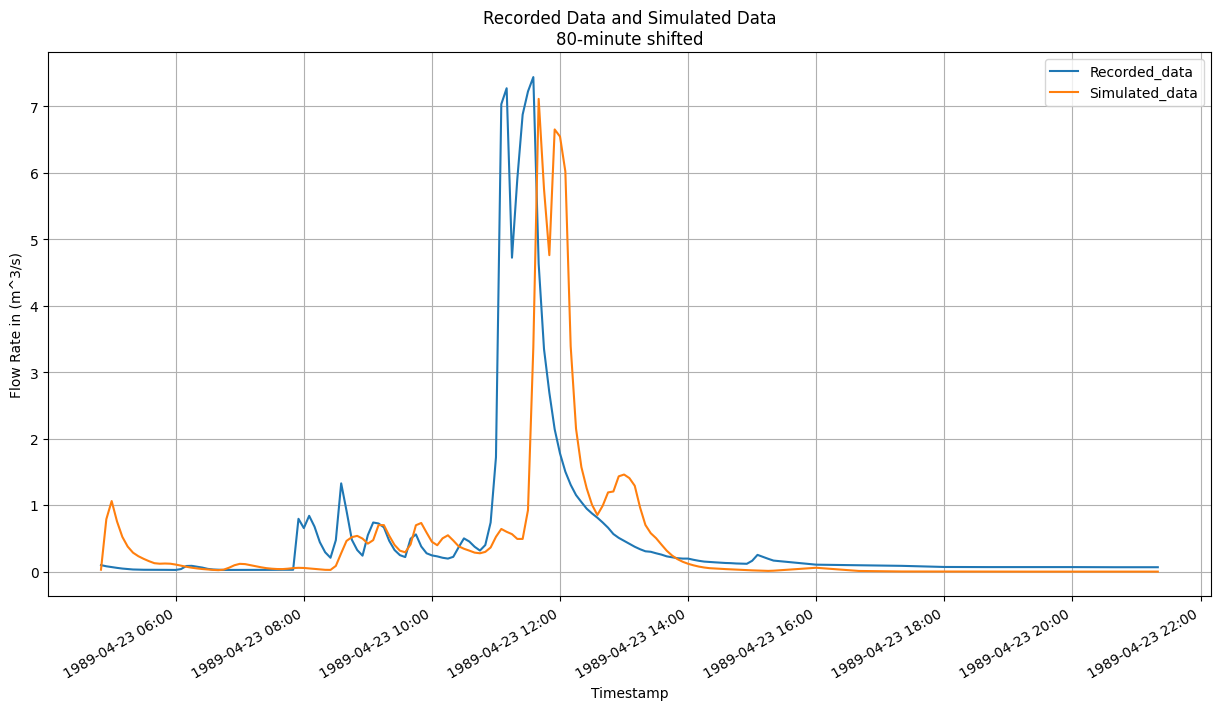

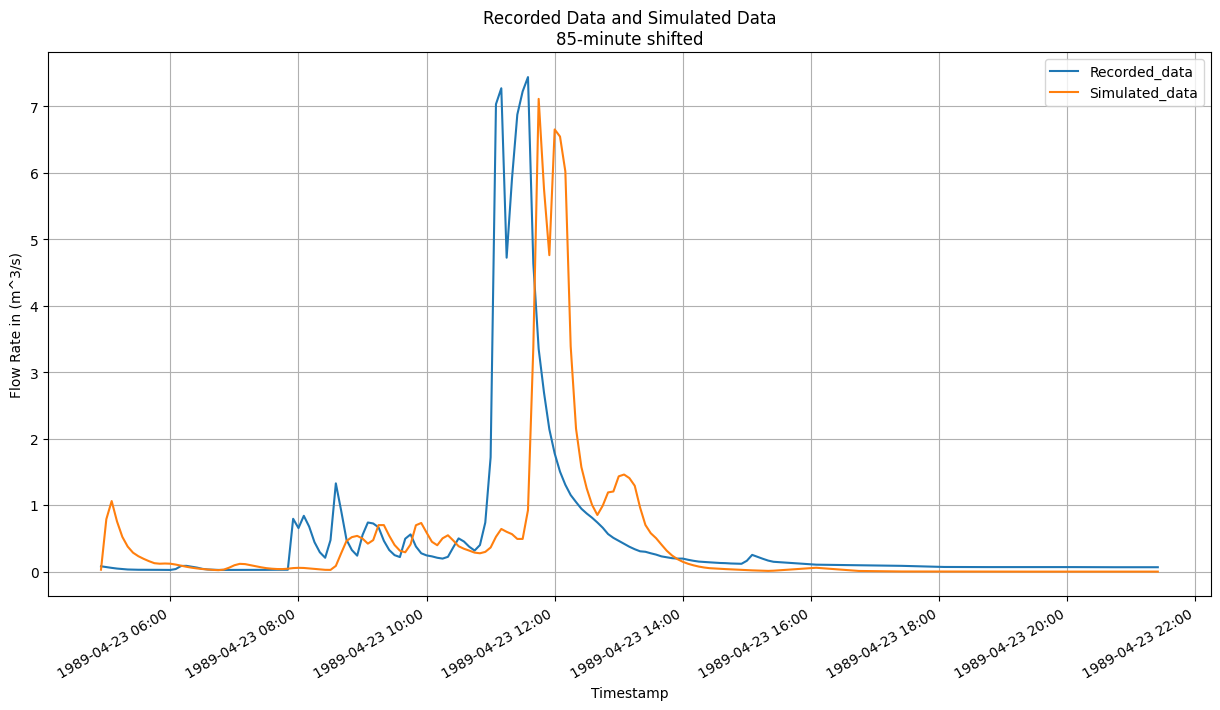

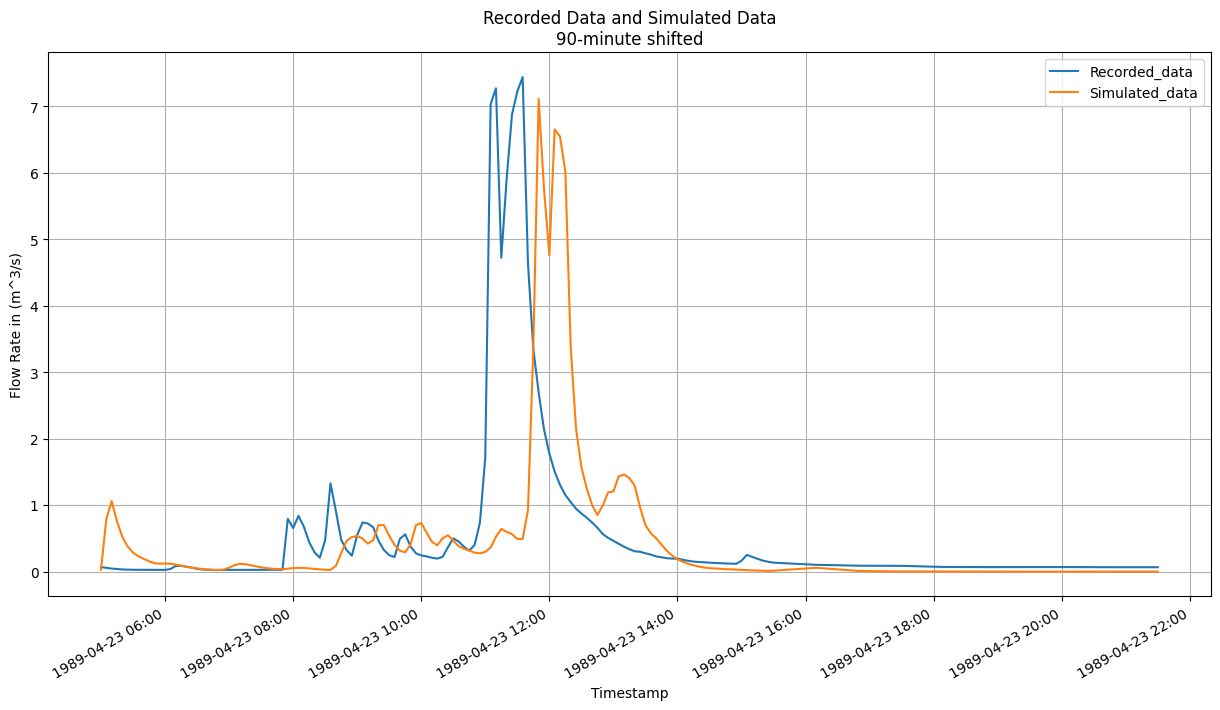

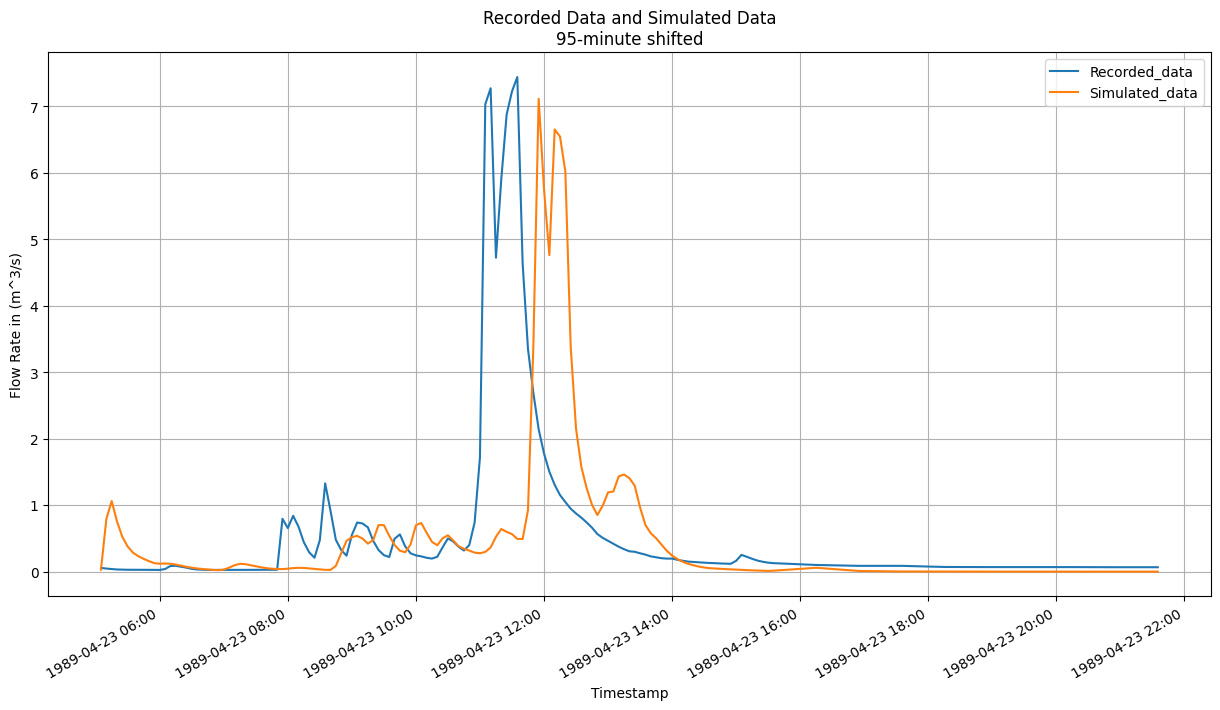

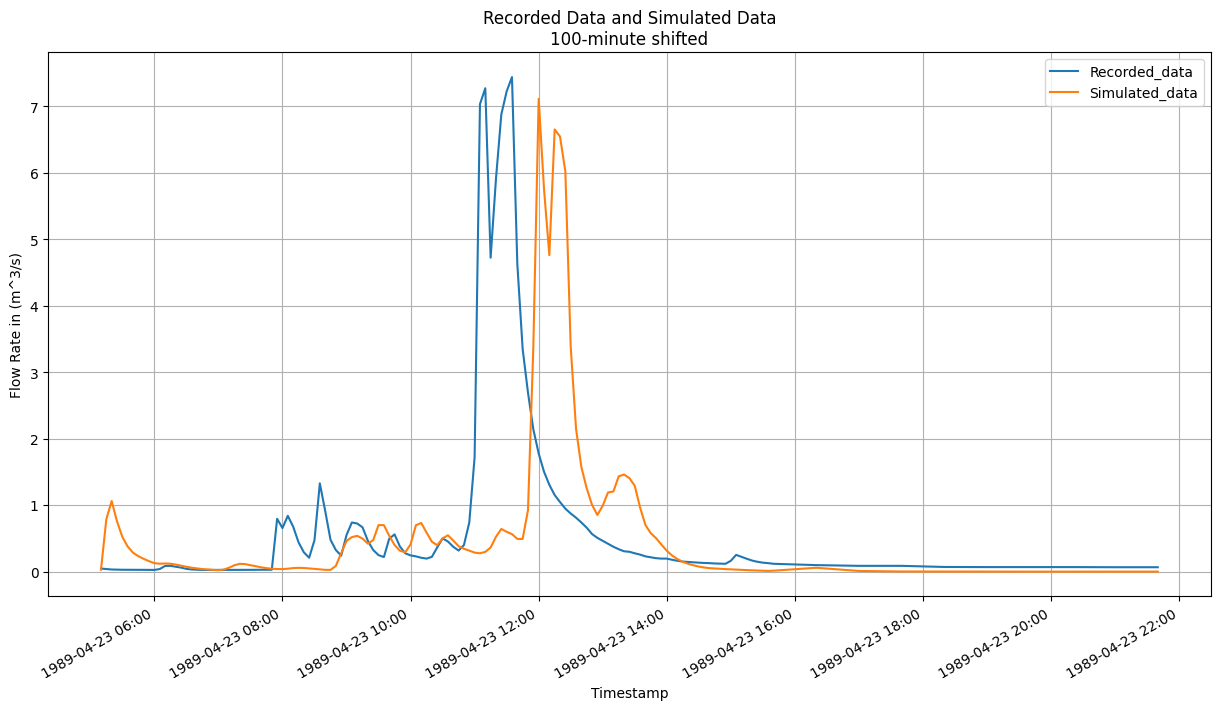

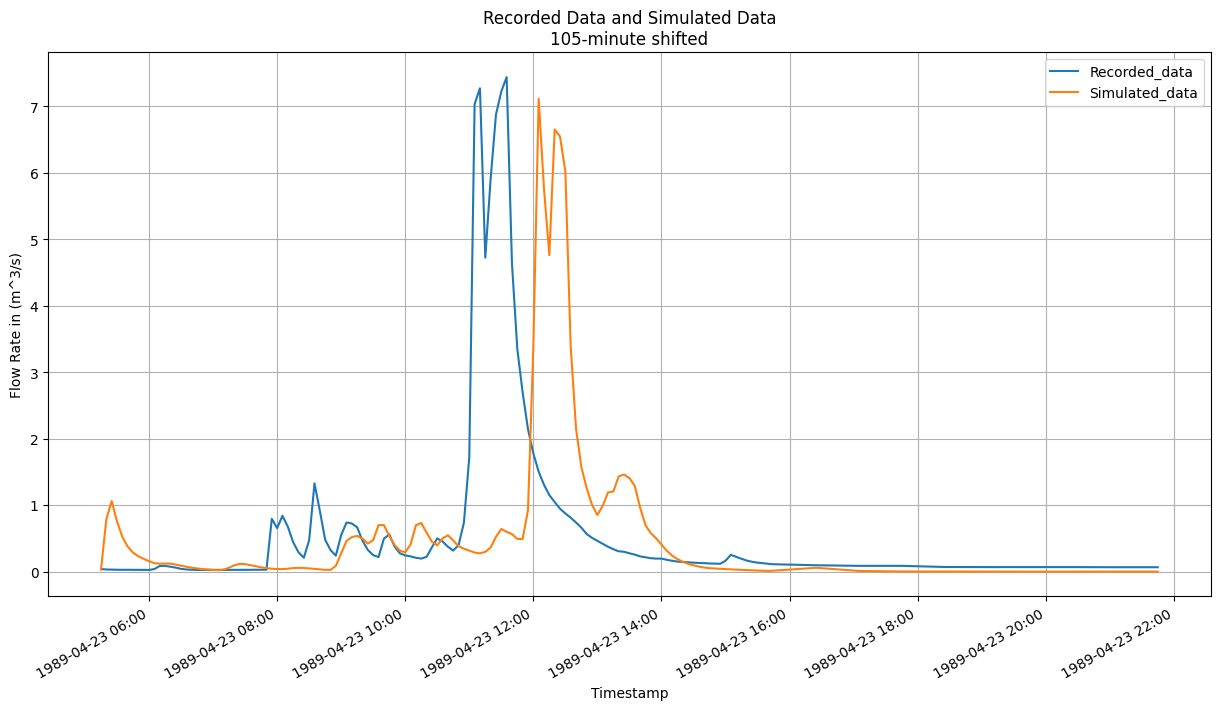

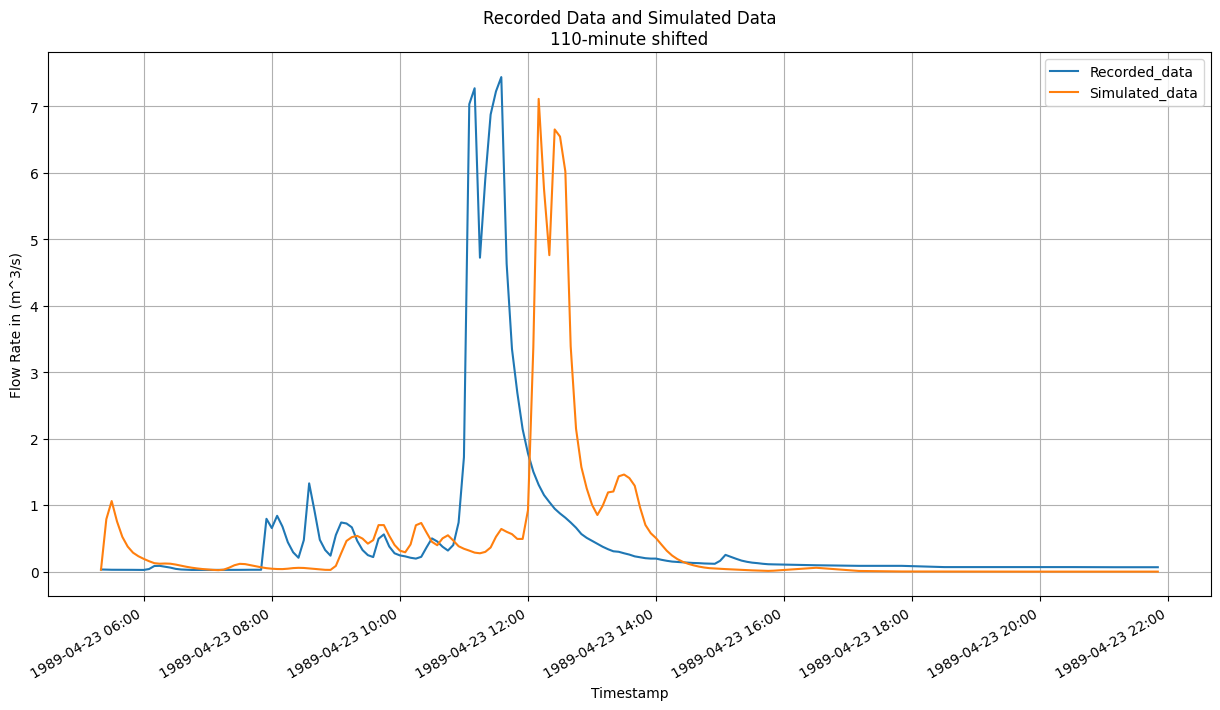

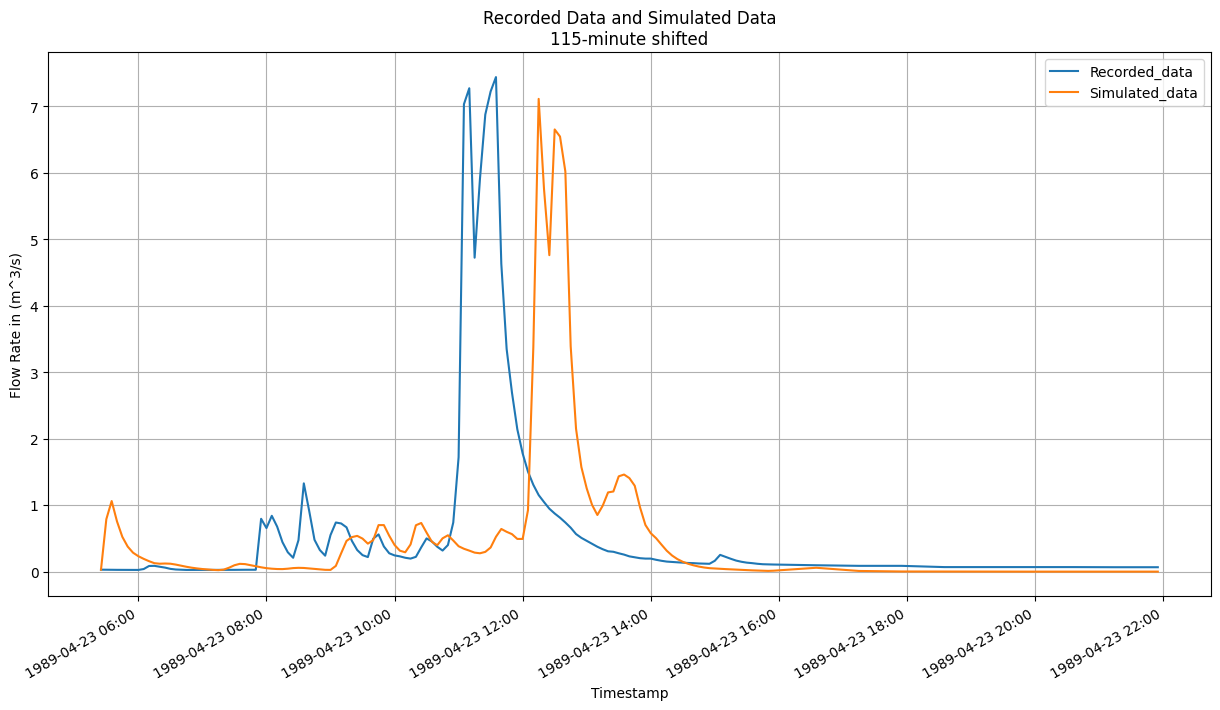

In [89]:
proposed_trans_values = proposed_trans_values.apply(lambda arg: move_compare_hydrographs(float(arg.transformation)), axis=1, result_type='expand')
proposed_trans_values.columns = ['delta_time', 'sim_data_transformed', 'min_time', 'max_time', 'df', 'metrics']
proposed_trans_values

# export results to csv

In [90]:
for ind in proposed_trans_values.index:
    proposed_trans_values.df[ind].reset_index(drop=True).to_csv(
        path_or_buf=arg_output_dir + 'shift_{:>03}_min.csv'.format(int(proposed_trans_values.delta_time[ind]/dt.timedelta(minutes=1))), 
        index=False
        )

# calibration metrics and exporting results

In [91]:
calib_metric = pd.concat(objs=[ind.set_index(keys='metric') for ind in proposed_trans_values.metrics], axis=1)
calib_metric.columns = ['shift_{:>02}_min'.format(int(ind/dt.timedelta(minutes=1))) for ind in proposed_trans_values.delta_time]
calib_metric.reset_index(inplace=True)
calib_metric.set_index(keys='metric', inplace=True)
calib_metric = calib_metric.T
calib_metric = calib_metric.apply(pd.to_numeric)
calib_metric.reset_index(inplace=True)
calib_metric.rename(columns={'index':'shift_time'}, inplace=True)
calib_metric.columns.name = None
calib_metric.to_csv(path_or_buf=arg_output_dir + 'calibration_metric.csv', index=False)
calib_metric.set_index(keys='shift_time', inplace=True)
calib_metric

,rmse,mse,ssd_abs,ssd_rel,nse,me,r2,kge,vol_dif
shift_time,,,,,,,,,
shift_00_min,1.872708,3.507036,476.956909,8985.018978,-0.505774,-0.095432,0.018225,0.518166,-5650.3650
shift_05_min,1.850727,3.425191,465.825908,7570.693998,-0.471419,-0.096386,0.024117,0.550847,-5622.0510
shift_10_min,1.811352,3.280996,446.215414,6758.586983,-0.410139,-0.097219,0.036585,0.602599,-5589.1950
shift_15_min,1.738341,3.021828,410.968608,6094.510630,-0.299359,-0.098038,0.065596,0.681186,-5580.4170
shift_20_min,1.598512,2.555241,347.512709,5300.336583,-0.099421,-0.099163,0.139132,0.790283,-5689.9230
shift_25_min,1.433303,2.054358,279.392649,4025.496434,0.115423,-0.100595,0.248551,0.875563,-5911.5150
shift_30_min,1.271611,1.616995,219.911360,1728.125284,0.303500,-0.101154,0.370030,0.929942,-5858.3910
shift_35_min,1.130286,1.277547,173.746336,293.656052,0.449528,-0.101690,0.480942,0.961472,-5808.4470
shift_40_min,0.926773,0.858907,116.811416,110.106567,0.629820,-0.102088,0.637812,0.988906,-5501.6850


# figures and exporting figures

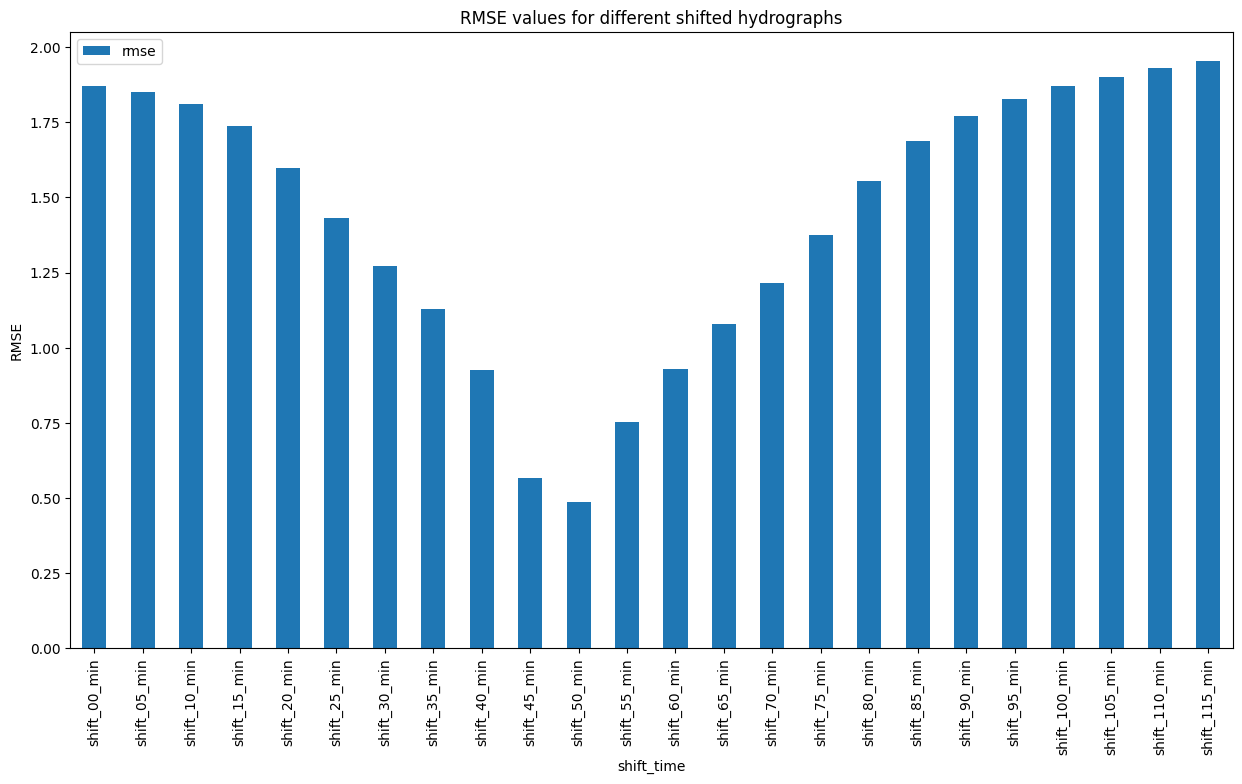

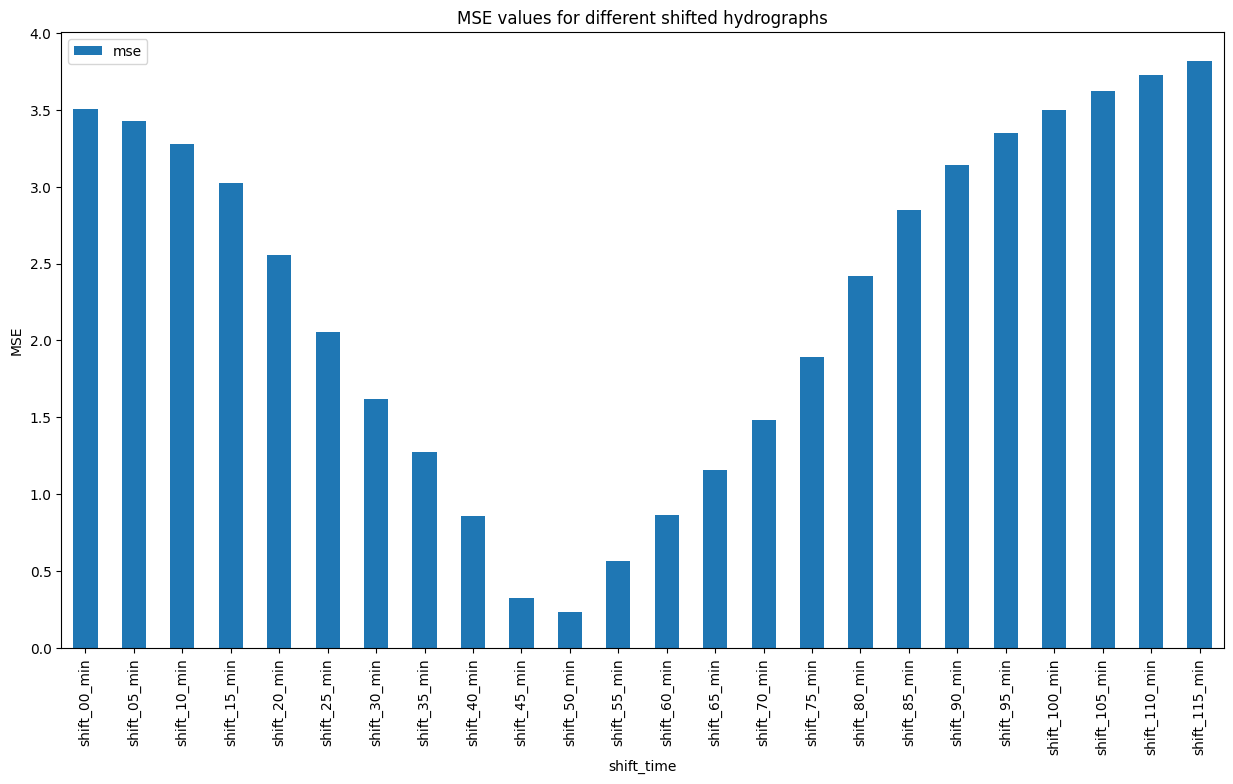

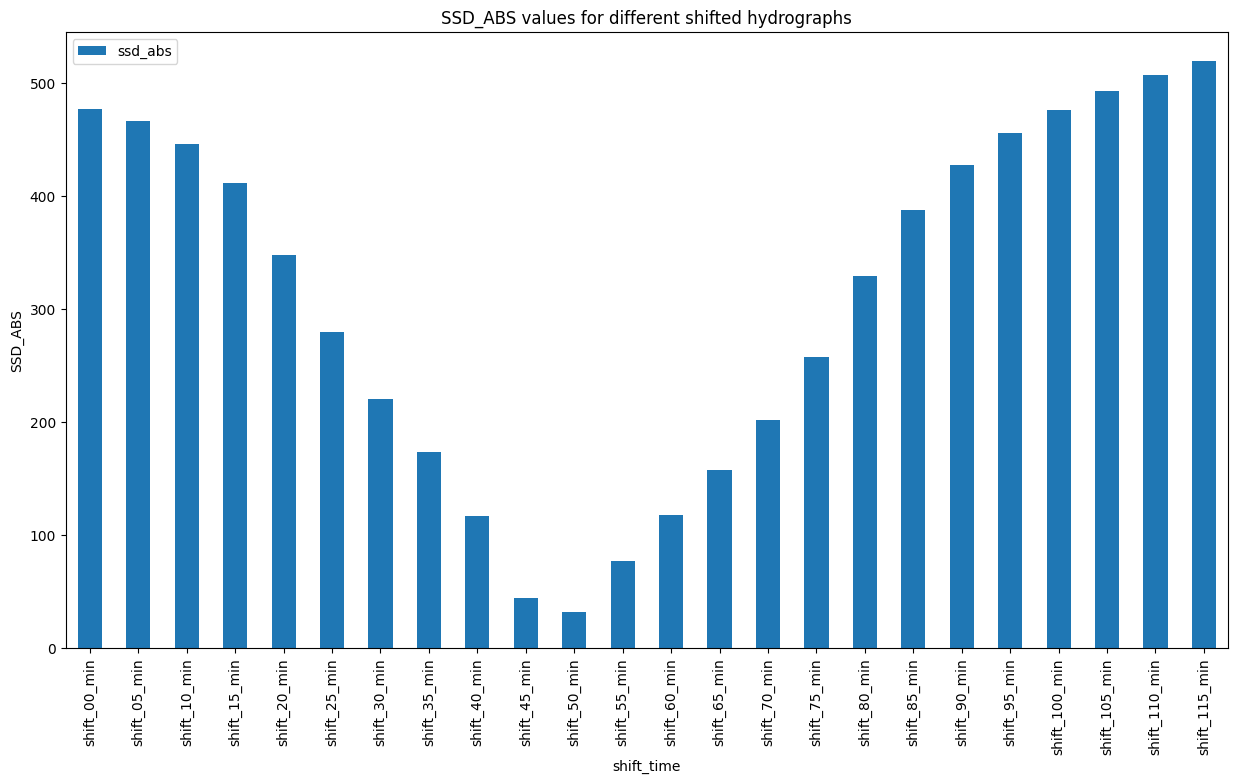

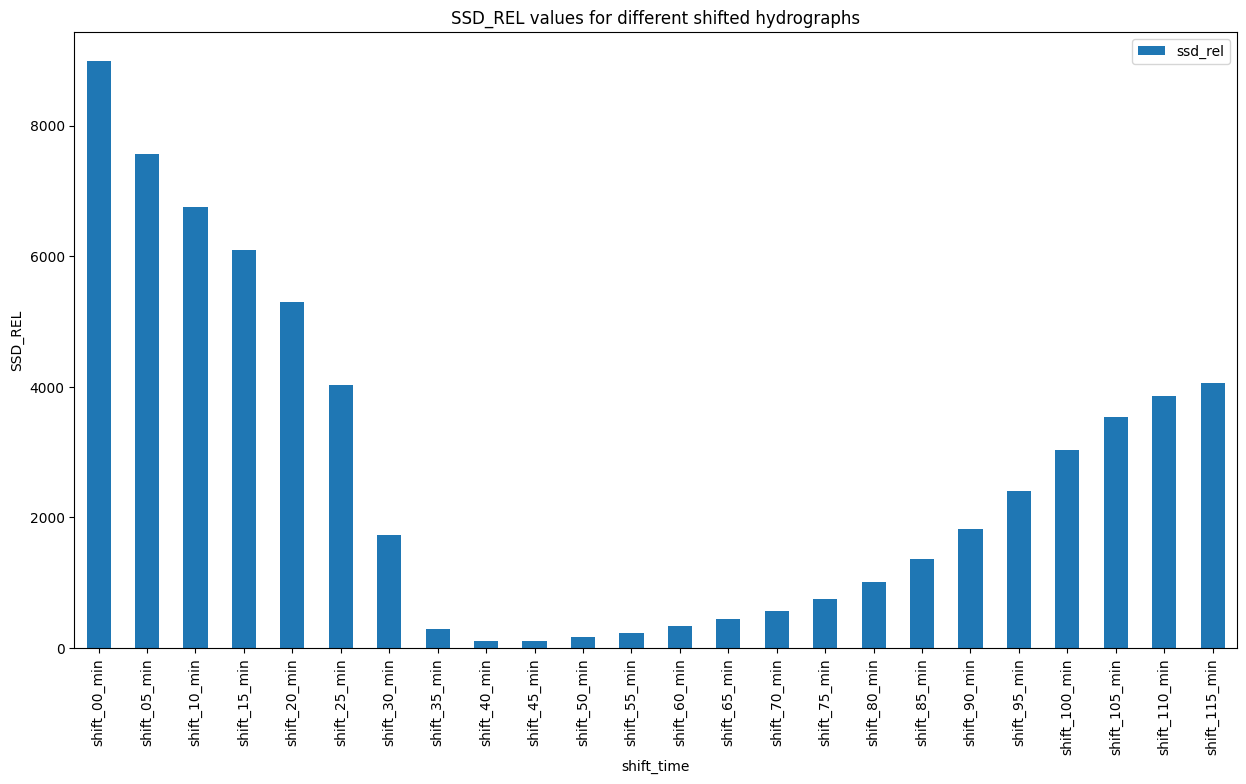

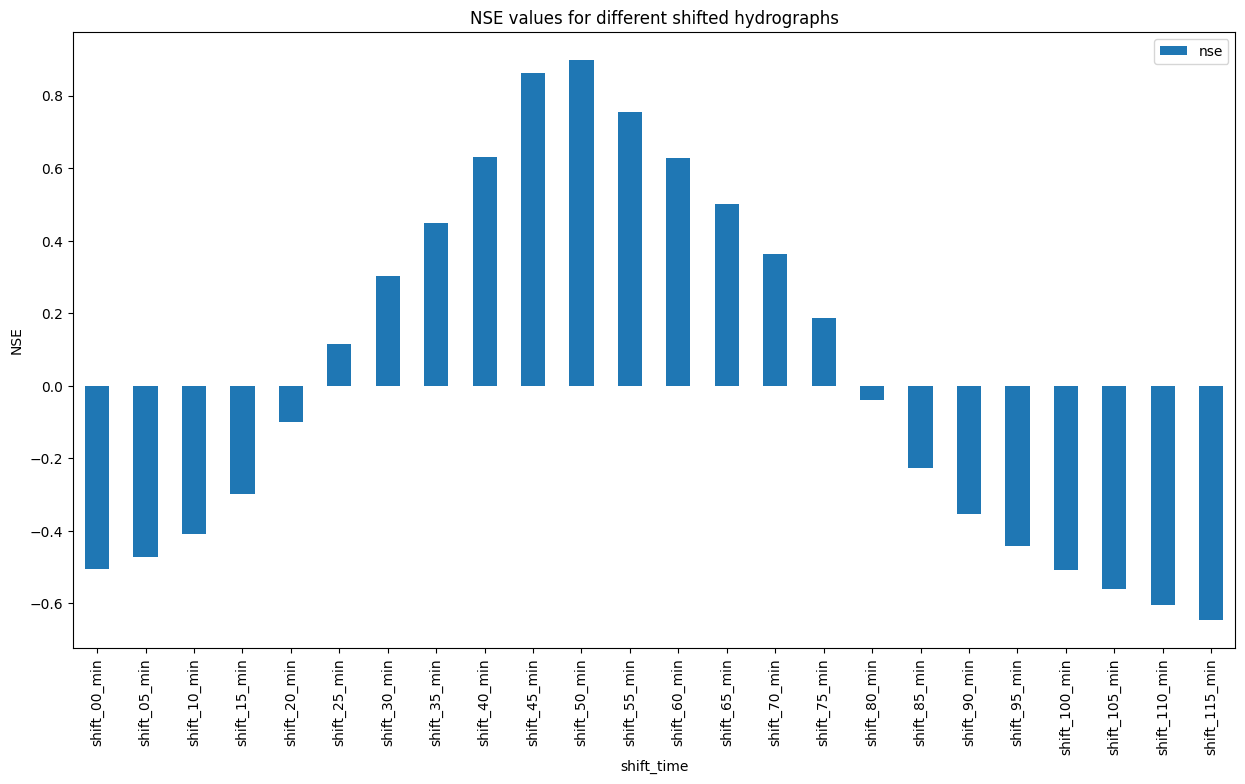

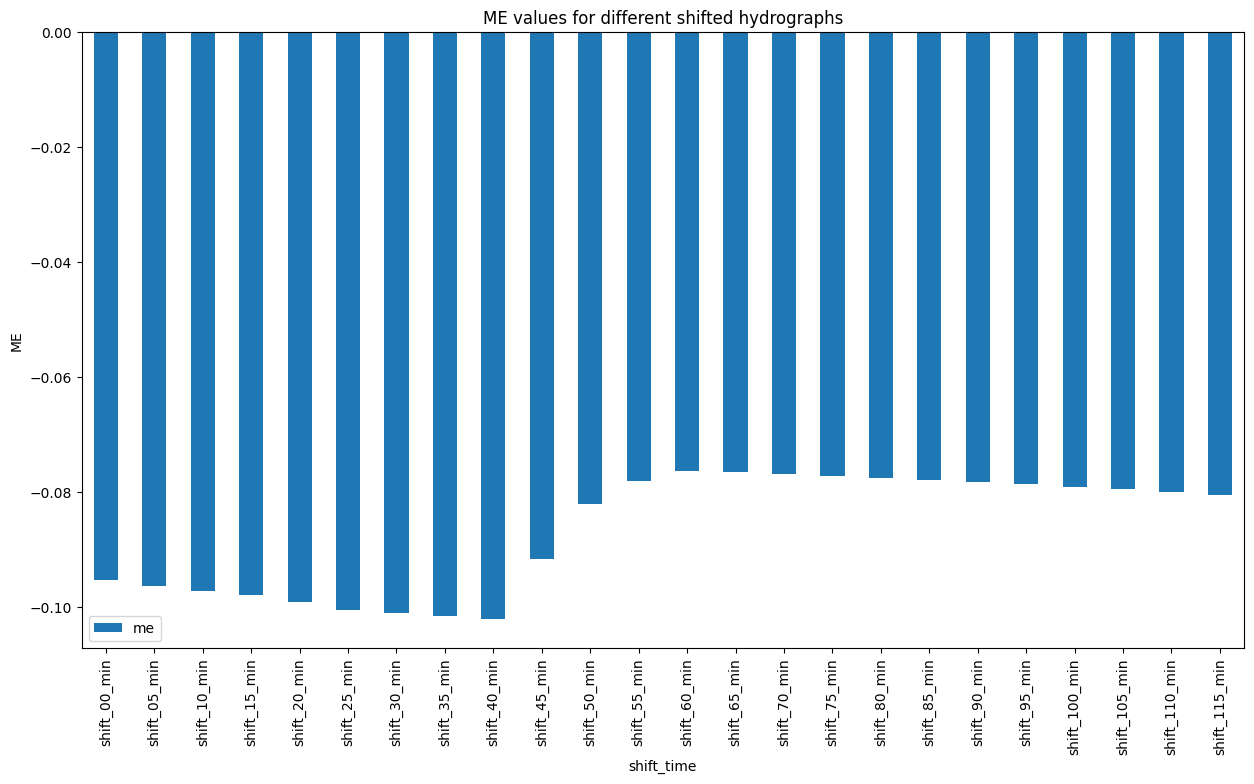

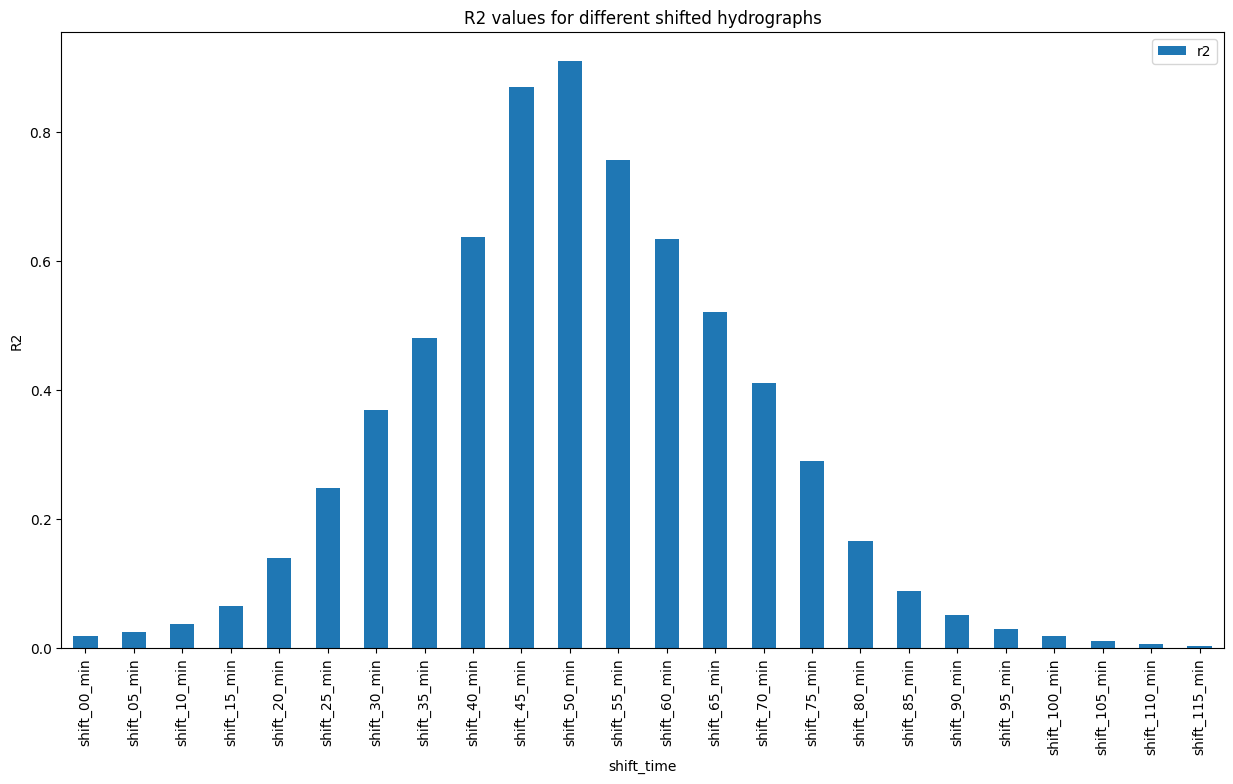

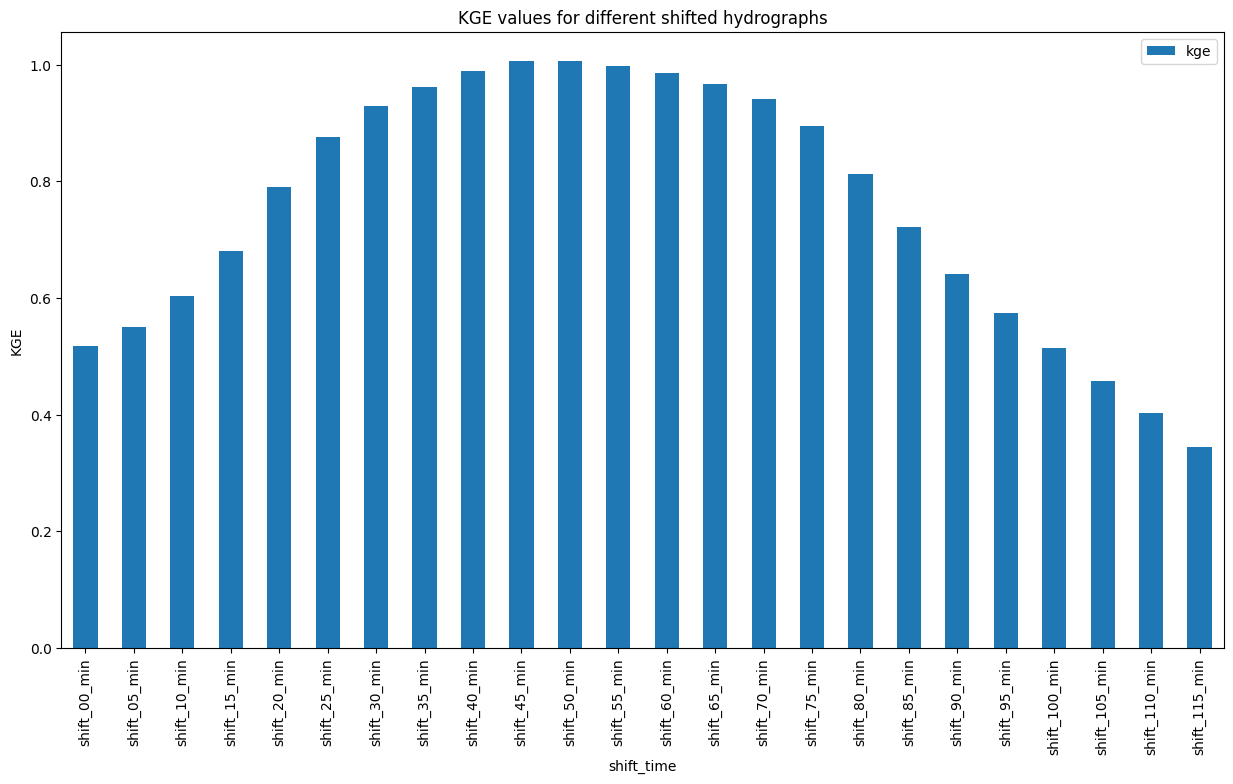

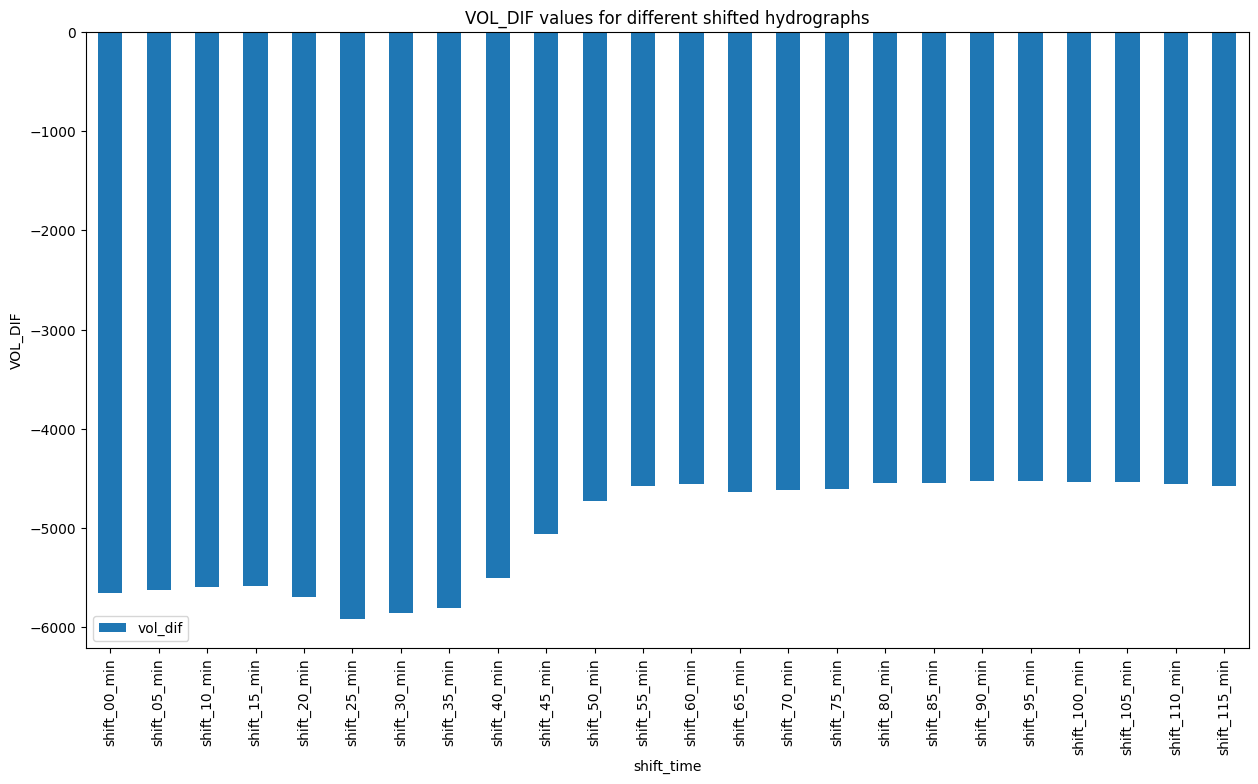

In [92]:
for col in calib_metric.columns:
    fig, ax = plt.subplots()
    ax = calib_metric.plot(
        y='{}'.format(col),
        kind='bar',
        ax=ax,
        figsize=(15,8),
        title='{} values for different shifted hydrographs'.format(calib_metric[col].name.upper()),
        ylabel='{}'.format(calib_metric[col].name.upper())
        )
    fig.savefig(arg_output_dir + 'bar_chart_{}.png'.format(calib_metric[col].name.upper()))